In [1]:
import os
import re
import sys
import glob
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [25]:
seq = 'ACTATCATATGCTTACCGTAACTTGAAAGTATTTCGATTTCTTGGCTTTATATATCTTGTGGAAAGGACGAAACACCGNNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTATGCTGGAAACAGCATAGC'

In [26]:
target = 'NNNNNNNNNNNNNNNNNNNN'
print(len(target))
flist = [m.span() for m in re.finditer(target, seq)]
print(flist)

20
[(78, 98)]


```bash
# 作業ディレクトリの作成
[uchiyamat@gifu: /NGSWORK/PROJECT/PG4874]$ mkdir -p 200_INFO
[uchiyamat@gifu: /NGSWORK/PROJECT/PG4874]$ cd 200_INFO/
```
```bash
# リードクオリティの確認
[uchiyamat@gifu: /NGSWORK/PROJECT/PG4874/200_INFO]$ mkdir -p 00_data
[uchiyamat@gifu: /NGSWORK/PROJECT/PG4874/200_INFO/00_data]$ export LANG='ja_JP.UTF-8'
[uchiyamat@gifu: /NGSWORK/PROJECT/PG4874/200_INFO/00_data]$ cd FastQC/
[uchiyamat@gifu: /NGSWORK/PROJECT/PG4874/200_INFO/00_data/FastQC]$ /NGSWORK/NGS/DOCUMENT/SOP/PacBio/SOP-14-Resequencing/00_tools/miniconda/envs/reseqencing-snakemake-py38/bin/multiqc .
```

```bash
# 標的配列の確認
[uchiyamat@gifu: /NGSWORK/PROJECT/PG4874/200_INFO/00_data]$ mkdir -p profile
```

In [4]:
# サンプルリストの読み込み
file = 'A:/PROJECT/PG4874/200_INFO/00_data/PG4874_samplelist.xlsx'
df = pd.read_excel(file)

In [5]:
df.head()

サンプルID 依頼書記載名称 その他1                   その他2
0  PG4874_01_a       1   #1      AAV2_A-172_Target
1  PG4874_02_a       2   #2  AAV2_A-172_GFP middle
2  PG4874_03_a       3   #3    AAV2_A-172_GFP high
3  PG4874_04_a       4   #4       AAV2_NB-1_Target
4  PG4874_05_a       5   #5   AAV2_NB-1_GFP middle

In [13]:
sample_id = {}
for i in range(len(df)):
    takaraID = df.loc[i, 'サンプルID']
    name = str(df.loc[i, '依頼書記載名称']) + '#' + df.loc[i, 'その他2']
    name = name.replace(' ', '_')
    sample_id[takaraID] = name

In [14]:
sample_id

{'PG4874_01_a': '1#AAV2_A-172_Target',
 'PG4874_02_a': '2#AAV2_A-172_GFP_middle',
 'PG4874_03_a': '3#AAV2_A-172_GFP_high',
 'PG4874_04_a': '4#AAV2_NB-1_Target',
 'PG4874_05_a': '5#AAV2_NB-1_GFP_middle',
 'PG4874_06_a': '6#AAV2_NB-1_GFP_high',
 'PG4874_07_a': '7#CereAAV_A-172_Target',
 'PG4874_08_a': '8#CereAAV_A-172_GFP_middle',
 'PG4874_09_a': '9#CereAAV_A-172_GFP_high',
 'PG4874_10_a': '10#CereAAV_NB-1_Target',
 'PG4874_11_a': '11#CereAAV_NB-1_GFP_middle',
 'PG4874_12_a': '12#CereAAV_NB-1_GFP_high',
 'PG4874_13_a': '13#AAV2_NB-1_hyg_Target',
 'PG4874_14_a': '14#AAV2_NB-1_hyg_GFP_middle',
 'PG4874_15_a': '15#AAV2_NB-1_hyg_GFP_high',
 'PG4874_16_a': '16#CereAAV_NB-1_hyg_Target',
 'PG4874_17_a': '17#CereAAV_NB-1_hyg_GFP_middle',
 'PG4874_18_a': '18#CereAAV_NB-1_hyg_GFP_high',
 'PG4874_19_a': 'A_1#Input-A',
 'PG4874_20_a': 'A_2#Input-A',
 'PG4874_21_a': 'A_3#Input-A',
 'PG4874_22_a': 'A_4#Input-A',
 'PG4874_23_a': 'A_5#Input-A',
 'PG4874_24_a': 'B_1#Input-B',
 'PG4874_25_a': 'B_2#Input-B

In [15]:
# シーケンスリードのプロファイリングの準備 --- 
# start=83, end=103

outf = 'A:/PROJECT/PG4874/200_INFO/00_data/profile/fq2fa.sh'
indir = 'A:/PROJECT/PG4874/100_COMMON/110_GAII'
with open(outf, 'w') as wf:
    for fq in sorted(glob.glob(os.path.join(indir, '*R1*fastq.gz'))):
        fq_file = os.path.splitext(os.path.basename(fq))[0]
        ID = re.compile(r'.*_(PG.*_.*)B.*_H1_L001_R1').search(os.path.splitext(fq_file)[0]).group(1)
        takaraID = ID + '_a'
        name = sample_id[takaraID]
        outfa = '/NGSWORK/PROJECT/PG4874/200_INFO/00_data/profile/' + name + '.fa'
        in_fq = '/NGSWORK/PROJECT/PG4874/100_COMMON/110_GAII/' + os.path.basename(fq)
        wf.write(f'seqkit fq2fa {in_fq} | seqkit subseq -r 73:113 - > {outfa}\n')

```bash
# 実行
[uchiyamat@edo: /NGSWORK/PROJECT/PG4874/200_INFO/00_data/profile]$ ./fq2fa.sh
```

In [16]:
# readの組成を確認 ---
from Bio import motifs
from Bio import SeqIO

indir = 'A:/PROJECT/PG4874/200_INFO/00_data/profile'
outdir = 'A:/PROJECT/PG4874/200_INFO/00_data/profile'

for fa in sorted(glob.glob(os.path.join(indir, '*fa'))):
    name = os.path.splitext(os.path.basename(fa))[0]
    fragment = []
    with open(fa, 'r') as handle:
        for record in SeqIO.parse(handle, "fasta"):
            fragment.append(record.seq)

    seq = motifs.create(fragment, alphabet='ACGTN')
    cnt_C = seq.counts
    pos_cnt_C = pd.DataFrame(cnt_C.values(), index=cnt_C.keys()).transpose()
    pos_freq_C = pos_cnt_C / len(fragment)
    pos_freq_C.index += 1
    outfile = os.path.join(outdir, name + '.xlsx')
    pos_freq_C.to_excel(outfile, index=False)
    print(outfile)

A:/PROJECT/PG4874/200_INFO/00_data/profile\1#AAV2_A-172_Target.xlsx
A:/PROJECT/PG4874/200_INFO/00_data/profile\10#CereAAV_NB-1_Target.xlsx
A:/PROJECT/PG4874/200_INFO/00_data/profile\11#CereAAV_NB-1_GFP_middle.xlsx
A:/PROJECT/PG4874/200_INFO/00_data/profile\12#CereAAV_NB-1_GFP_high.xlsx
A:/PROJECT/PG4874/200_INFO/00_data/profile\13#AAV2_NB-1_hyg_Target.xlsx
A:/PROJECT/PG4874/200_INFO/00_data/profile\14#AAV2_NB-1_hyg_GFP_middle.xlsx
A:/PROJECT/PG4874/200_INFO/00_data/profile\15#AAV2_NB-1_hyg_GFP_high.xlsx
A:/PROJECT/PG4874/200_INFO/00_data/profile\16#CereAAV_NB-1_hyg_Target.xlsx
A:/PROJECT/PG4874/200_INFO/00_data/profile\17#CereAAV_NB-1_hyg_GFP_middle.xlsx
A:/PROJECT/PG4874/200_INFO/00_data/profile\18#CereAAV_NB-1_hyg_GFP_high.xlsx
A:/PROJECT/PG4874/200_INFO/00_data/profile\2#AAV2_A-172_GFP_middle.xlsx
A:/PROJECT/PG4874/200_INFO/00_data/profile\3#AAV2_A-172_GFP_high.xlsx
A:/PROJECT/PG4874/200_INFO/00_data/profile\4#AAV2_NB-1_Target.xlsx
A:/PROJECT/PG4874/200_INFO/00_data/profile\5#AAV2_N

A:/PROJECT/PG4874/200_INFO/00_data/profile\1#AAV2_A-172_Target.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\10#CereAAV_NB-1_Target.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\11#CereAAV_NB-1_GFP_middle.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\12#CereAAV_NB-1_GFP_high.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\13#AAV2_NB-1_hyg_Target.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\14#AAV2_NB-1_hyg_GFP_middle.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\15#AAV2_NB-1_hyg_GFP_high.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\16#CereAAV_NB-1_hyg_Target.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\17#CereAAV_NB-1_hyg_GFP_middle.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\18#CereAAV_NB-1_hyg_GFP_high.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\2#AAV2_A-172_GFP_middle.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\3#AAV2_A-172_GFP_high.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\4#AAV2_NB-1_Target.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\5#AAV2_NB-1_GFP_middl

C:\ProgramData\Anaconda3\lib\site-packages\logomaker\src\Logo.py:194: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=self.figsize)


A:/PROJECT/PG4874/200_INFO/00_data/profile\A_3#Input-A.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\A_4#Input-A.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\A_5#Input-A.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\B_1#Input-B.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\B_2#Input-B.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\B_3#Input-B.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\B_4#Input-B.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\B_5#Input-B.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\C_1#Input-C.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\C_2#Input-C.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\C_3#Input-C.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\C_4#Input-C.png
A:/PROJECT/PG4874/200_INFO/00_data/profile\C_5#Input-C.png


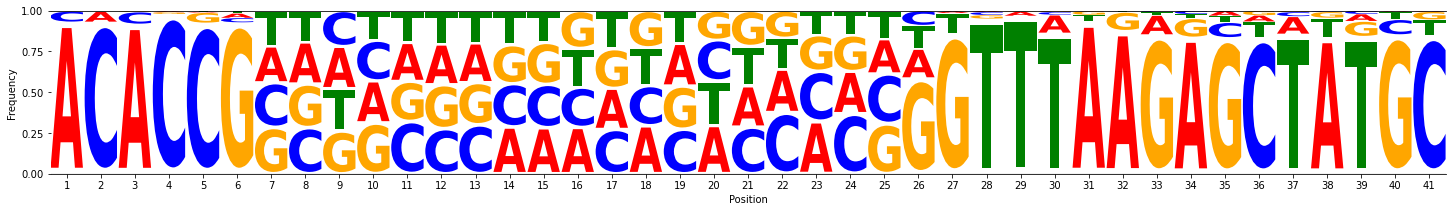

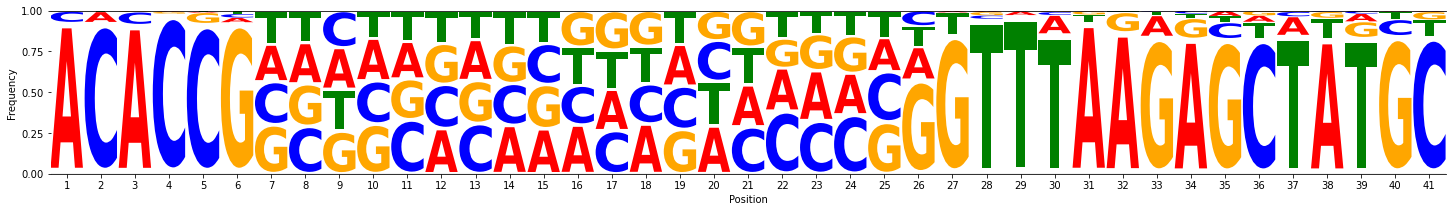

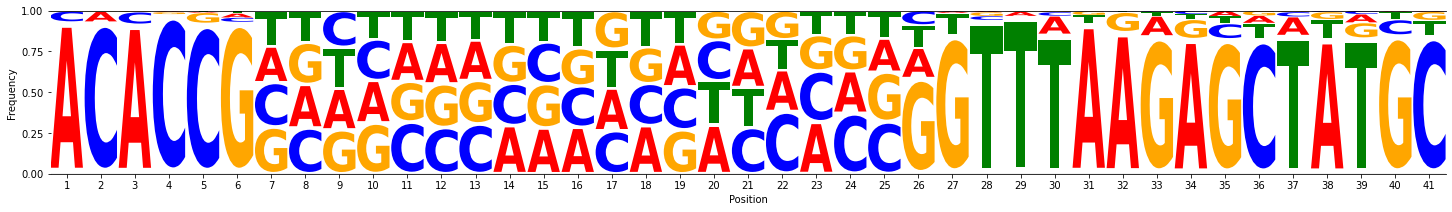

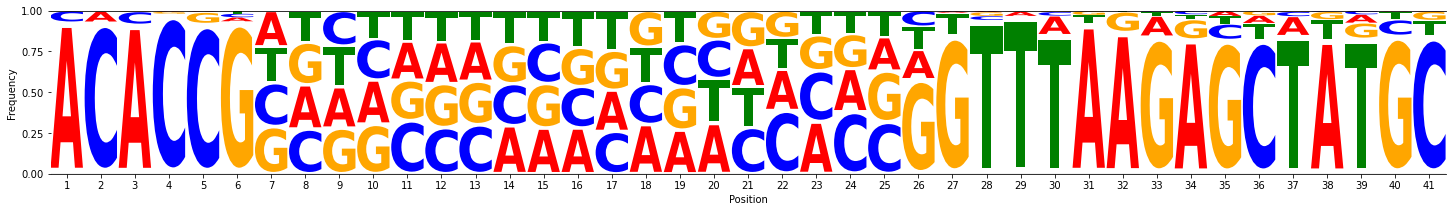

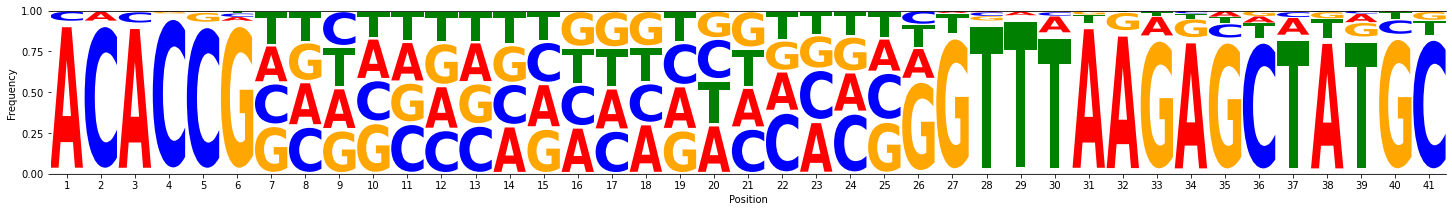

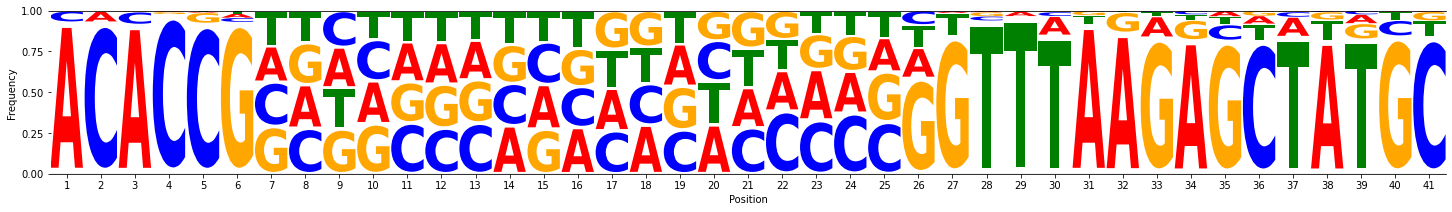

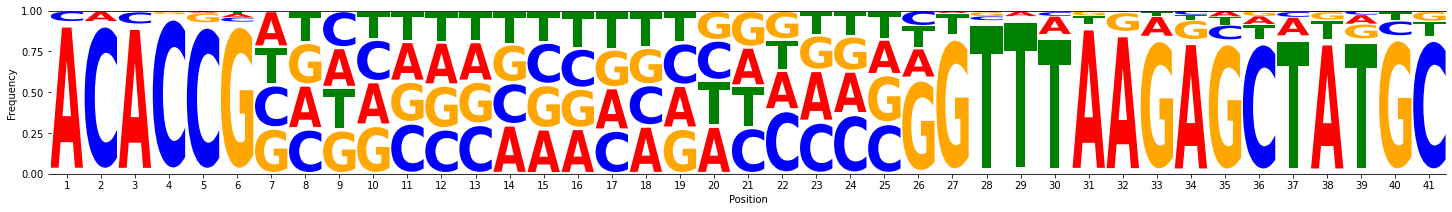

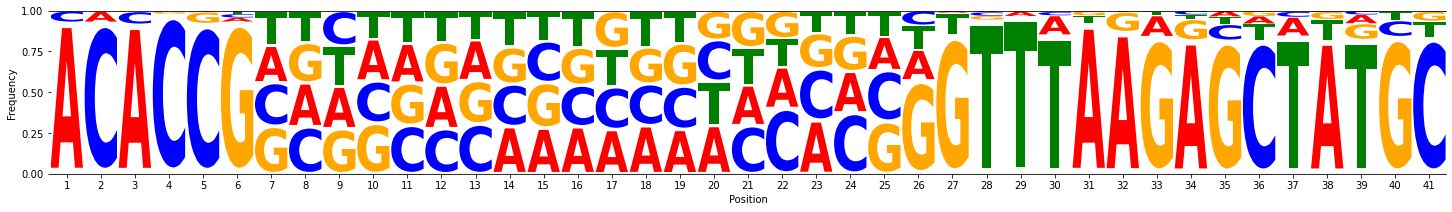

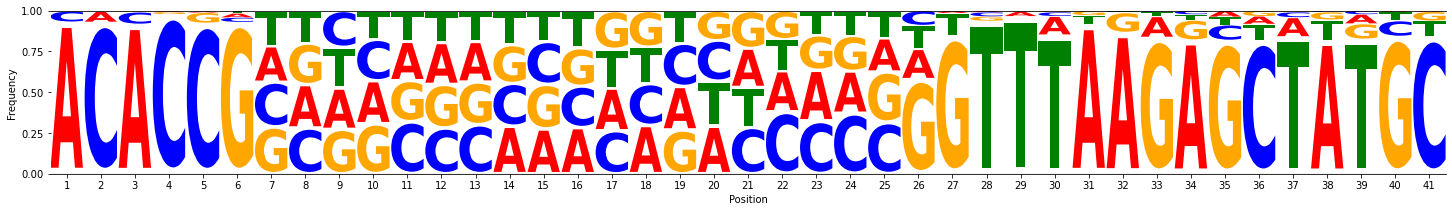

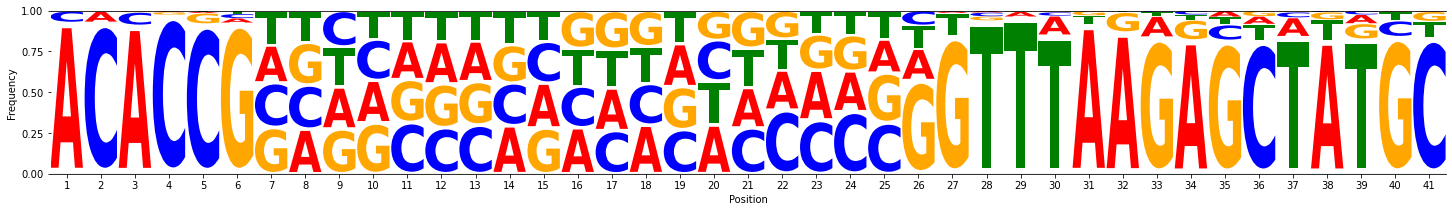

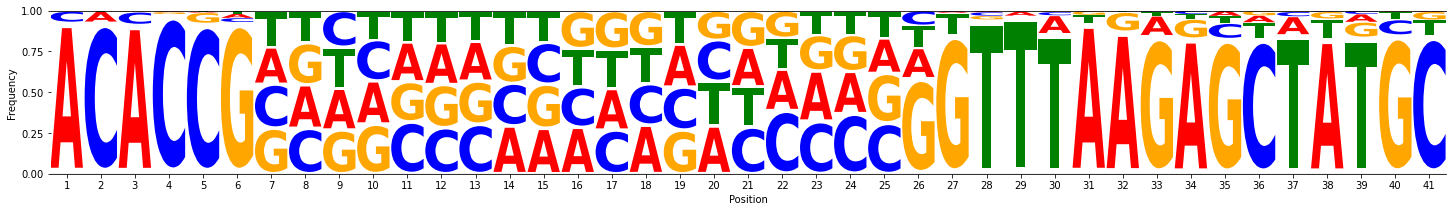

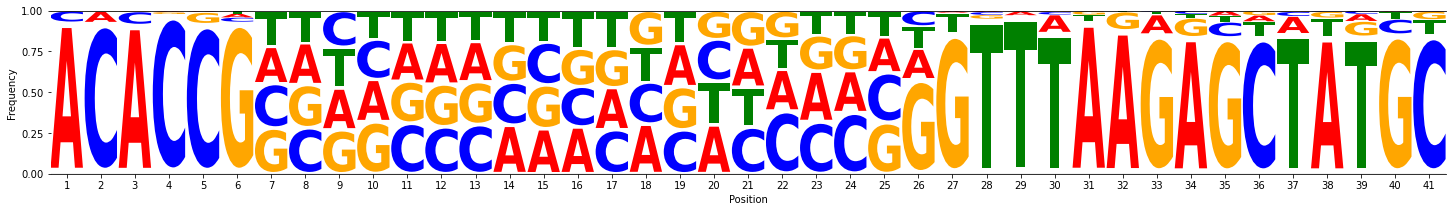

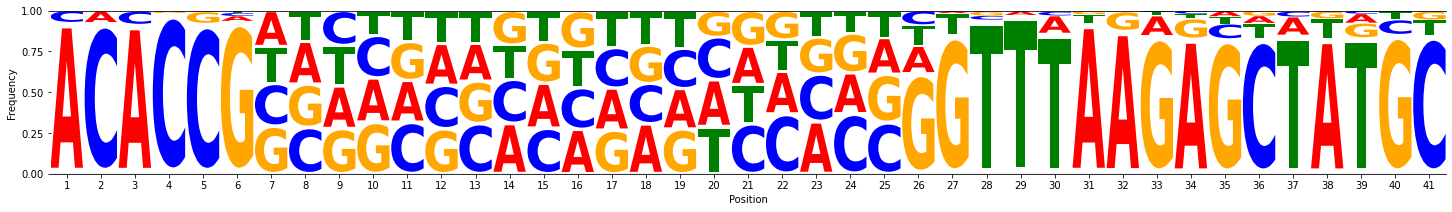

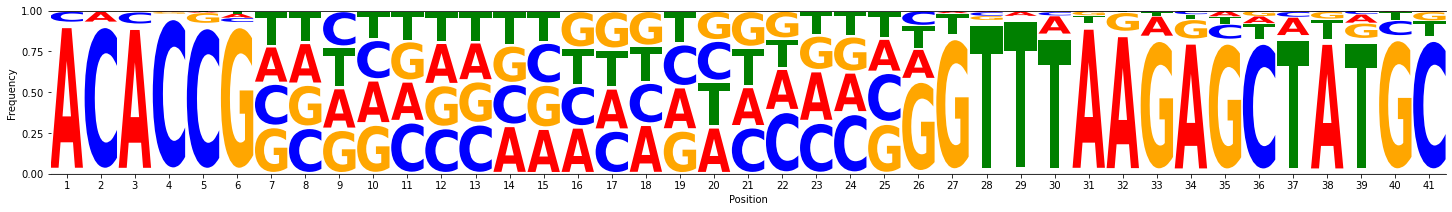

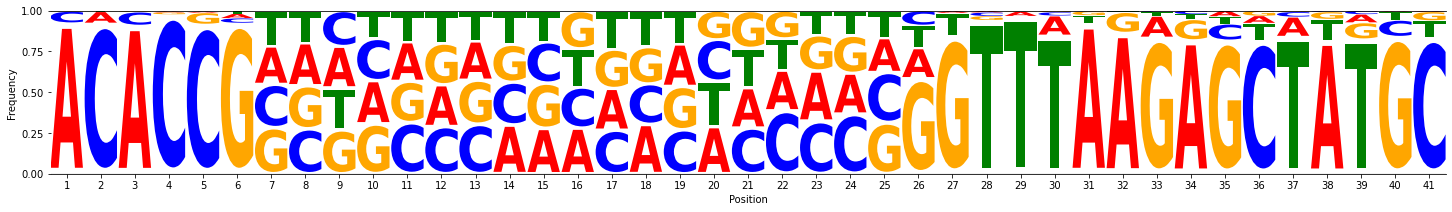

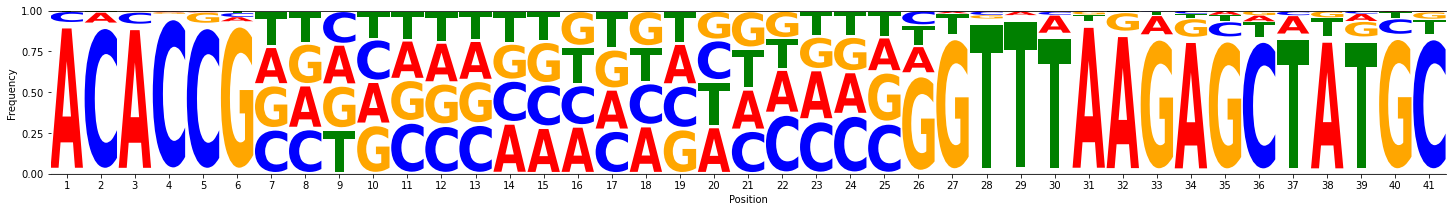

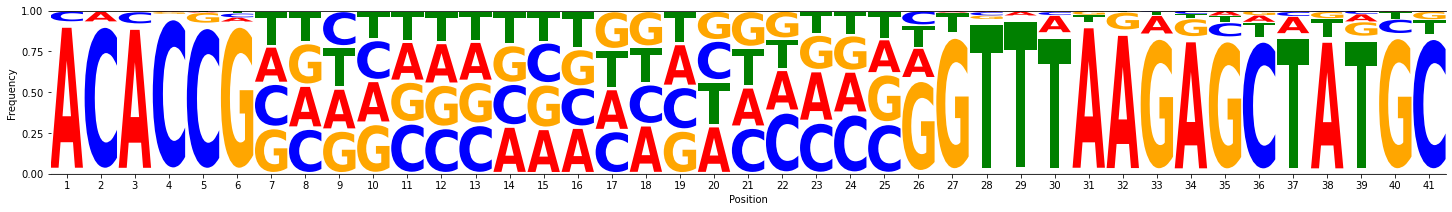

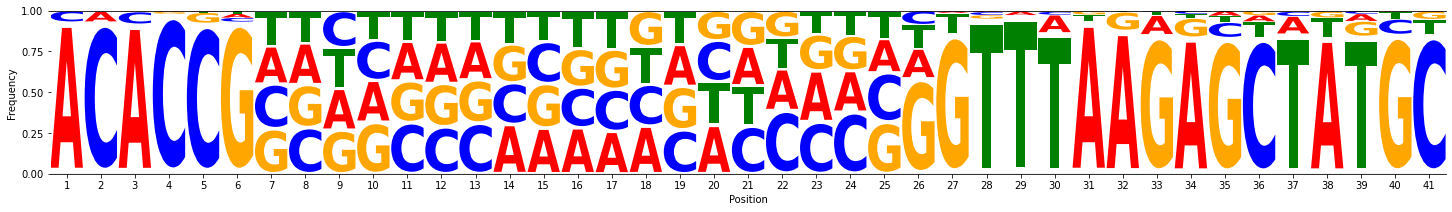

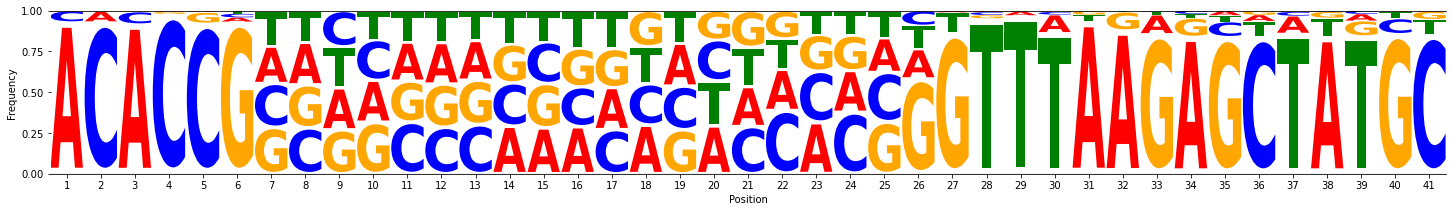

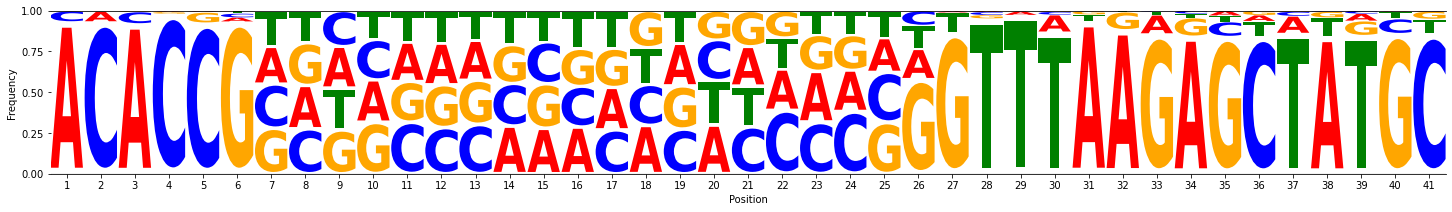

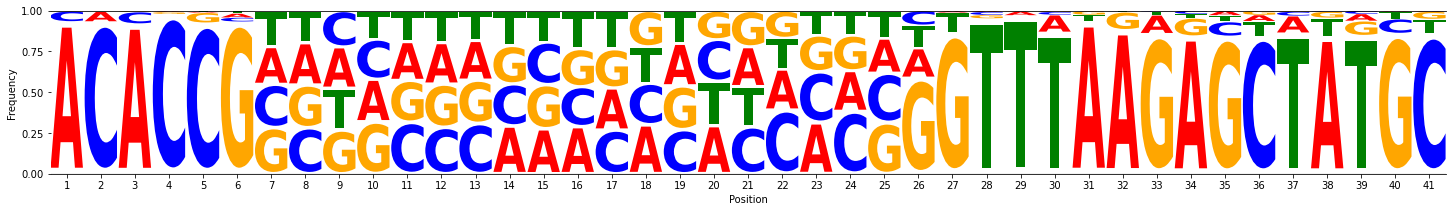

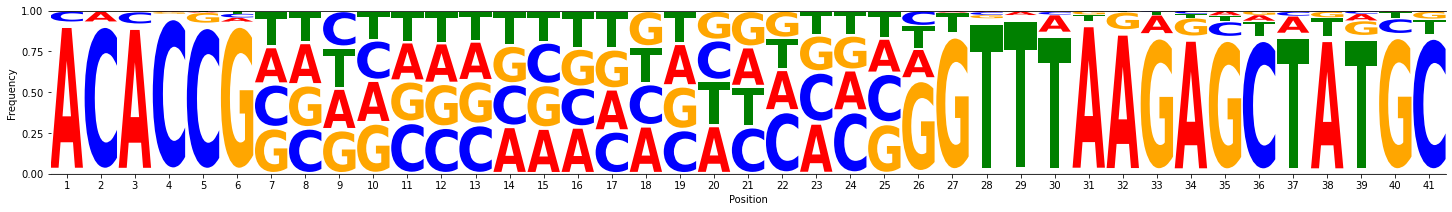

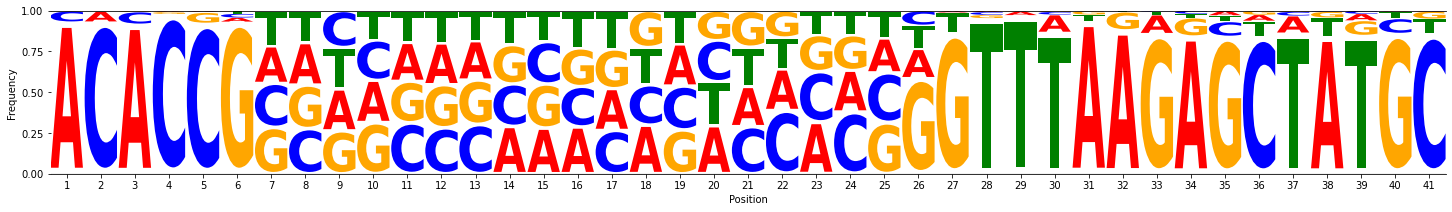

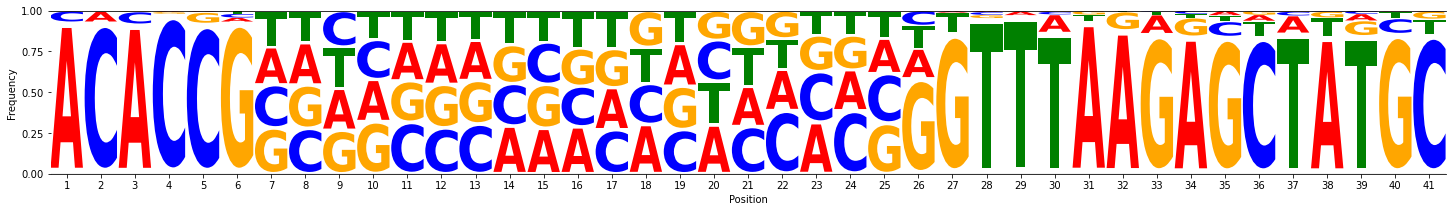

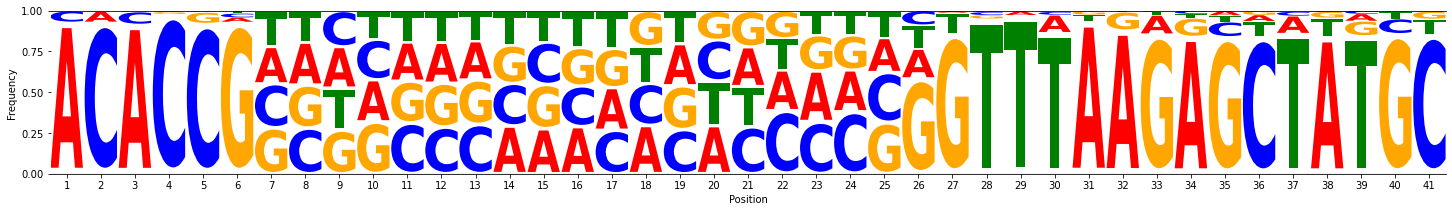

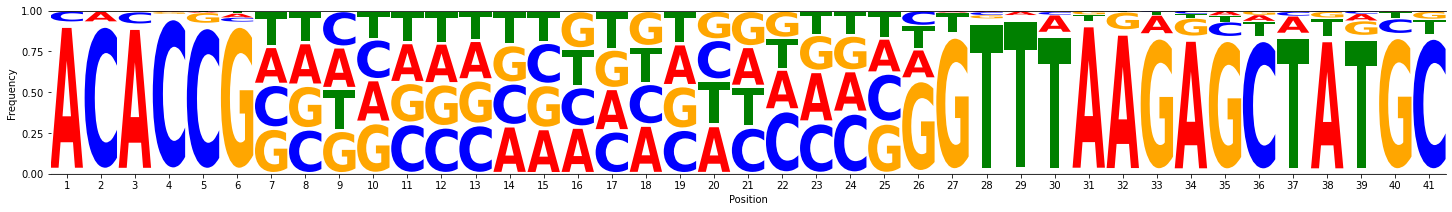

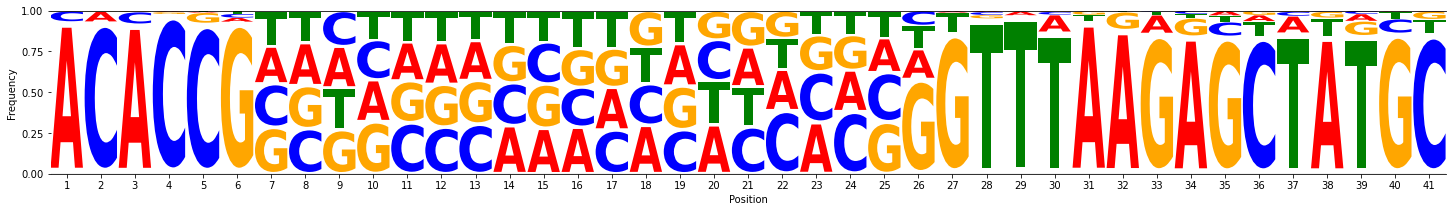

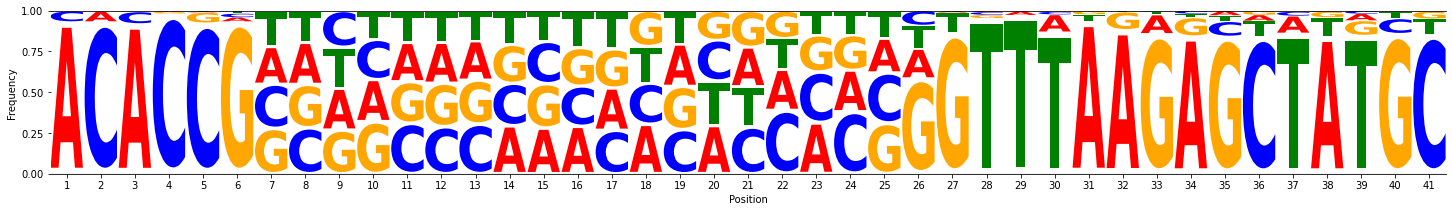

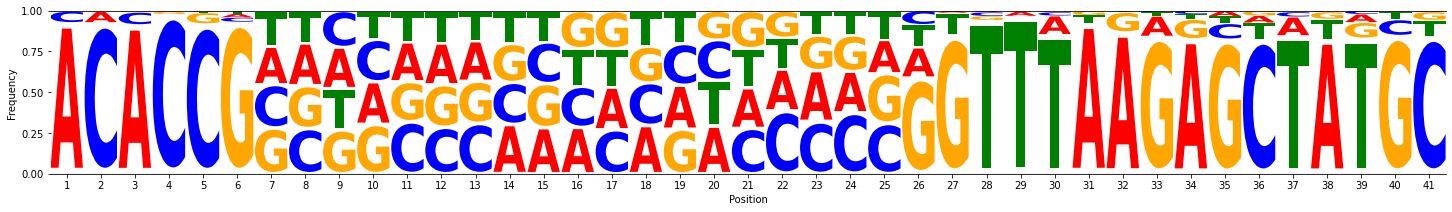

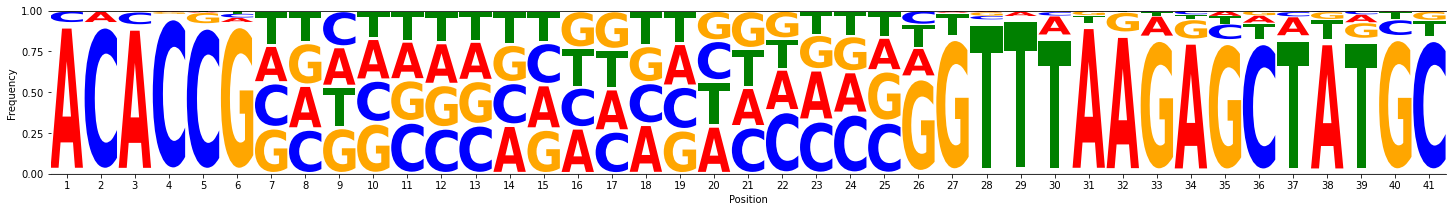

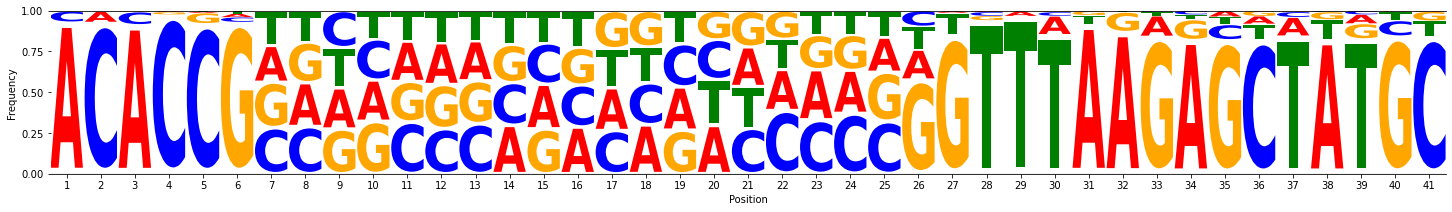

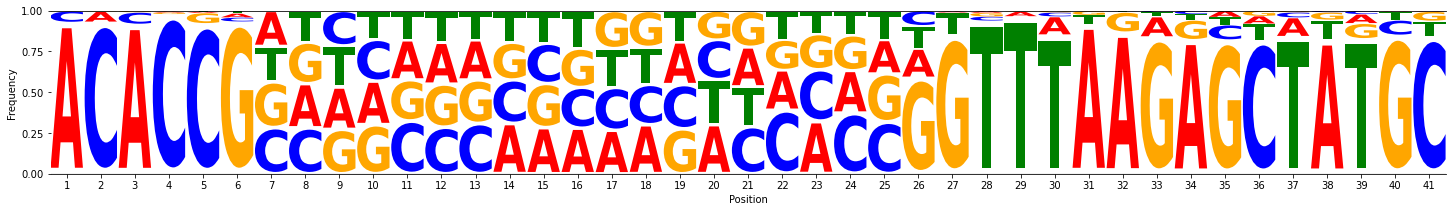

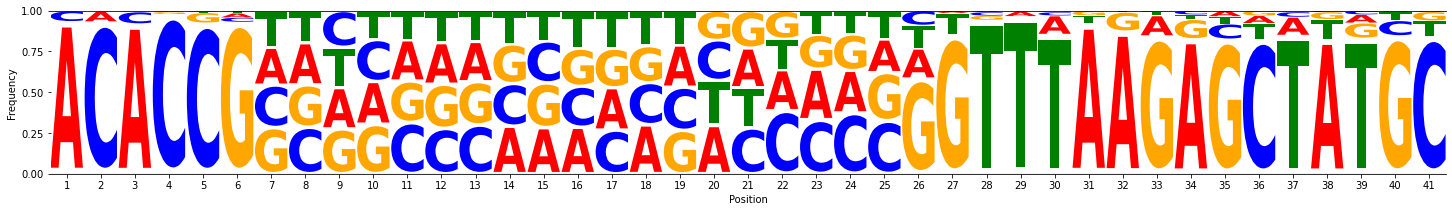

In [17]:
# logomekerでシーケンスロゴを作成-------------------------------------
# https://logomaker.readthedocs.io/en/latest/examples.html
# pip install logomaker
import pandas as pd
import numpy as np
import logomaker as lm
import matplotlib.pyplot as plt

indir = 'A:/PROJECT/PG4874/200_INFO/00_data/profile'
outdir = 'A:/PROJECT/PG4874/200_INFO/00_data/profile'

for xlsx in sorted(glob.glob(os.path.join(indir, '*xlsx'))):
    name = os.path.splitext(os.path.basename(xlsx))[0]
    color_scheme = {
        'T' : [0, 0.5, 0], # green
        'A' : [1, 0, 0], # red
        'G' : [1, 0.65, 0], # yellow
        'C' : [0, 0, 1], # blue
        'N': 'gray'
    }
    pos_freq_C = pd.read_excel(xlsx)
    pos_freq_C.index += 1

    logo = lm.Logo(
        pos_freq_C,
        baseline_width=0.1,
        vpad=0.08,
        fade_probabilities=False,
        stack_order='small_on_top',
        color_scheme=color_scheme,
        #font_name='Luxi Mono',
        #color_scheme='class',
        #font_name='Rosewood Std',
        figsize=(25, 3.0)
    )
    logo.style_spines(spines=['left', 'right'], visible=False)
    # style using Axes methods
    logo.ax.set_xticks(np.arange(1, len(pos_freq_C)+1, step=1))
    logo.ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    logo.ax.set_xlabel('Position')
    logo.ax.set_ylabel('Frequency')
    #plt.show()
    outfile = os.path.join(outdir, name + '.png')
    plt.savefig(outfile)
    print(outfile)

### 230208内山：全33検体は特定の領域で切り出しても問題ないことを確認した。

In [30]:
# テスト
# 78, 98
seq = 'ACTATCATATGCTTACCGTAACTTGAAAGTATTTCGATTTCTTGGCTTTATATATCTTGTGGAAAGGACGAAACACCGGAGACTCTTGAGGAGATAGGGTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTTTAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTTTTTTTG'
print(seq[78:98])
print(len(seq[78:98]))

GAGACTCTTGAGGAGATAGG
20


```bash
# 標的配列の切り出し
[uchiyamat@edo: /NGSWORK/PROJECT/PG4874/200_INFO]$ mkdir -p 01_read
```

In [36]:
# 標的配列の切り出し
# seqkitでは、start=79, end=98

outf = 'A:/PROJECT/PG4874/200_INFO/01_read/extract_target.sh'
indir = 'A:/PROJECT/PG4874/100_COMMON/110_GAII'
with open(outf, 'w') as wf:
    for fq in sorted(glob.glob(os.path.join(indir, '*R1*fastq.gz'))):
        fq_file = os.path.splitext(os.path.basename(fq))[0]
        ID = re.compile(r'.*_(PG.*_.*)B.*_H1_L001_R1').search(os.path.splitext(fq_file)[0]).group(1)
        takaraID = ID + '_a'
        name = sample_id[takaraID]
        outfq = '/NGSWORK/PROJECT/PG4874/200_INFO/01_read/' + name + '.fq'
        in_fq = '/NGSWORK/PROJECT/PG4874/100_COMMON/110_GAII/' + os.path.basename(fq)
        wf.write(f'seqkit subseq -r 79:98 {in_fq} > {outfq}\n')

In [35]:
# 長さとsgRNAであることの確認

# @M05015:183:000000000-KTKPN:1:1101:15049:2104 1:N:0:TAAGGCGA+CTCTCTAT
# CAGCTGTCACCTATGATCAG
len('CAGCTGTCACCTATGATCAG')

# CAGCTGTCACCTATGATCAGは、
# 以下のsgRNAとして632650-Lot_2010003_sgRNA_Library_Data_File-102120.xlsxに登録されていることを確認した。
# TSPYL4 -> 4|sgTSPYL4_2|TSPYL4

20

```bash
# 各コントロール5検体を1つにまとめる。
[uchiyamat@gifu: /NGSWORK/PROJECT/PG4874/200_INFO/01_read]$ cat A_* > Input-A.fq
[uchiyamat@gifu: /NGSWORK/PROJECT/PG4874/200_INFO/01_read]$ cat B_* > Input-B.fq
[uchiyamat@gifu: /NGSWORK/PROJECT/PG4874/200_INFO/01_read]$ cat C_* > Input-C.fq
```

## mageck用のinputファイルを作成

```bash
[uchiyamat@edo: /NGSWORK/PROJECT/PG4874/200_INFO]$ mkdir -p 02_cnt
```

In [47]:
file = 'A:/PROJECT/PG4874/000_DOC/632650-Lot_2010003_sgRNA_Library_Data_File-102120.xlsx'
df_sgRNA = pd.read_excel(file,  skiprows=16)
df_sgRNA.columns = df_sgRNA.iloc[0, :]

In [48]:
df_sgRNA.head(20)

0   HUGO gene name                          sgRNA ID  \
0   HUGO gene name                          sgRNA ID   
1          NegCtrl  1|Neg_Control_Human_0001|NegCtrl   
2          NegCtrl  1|Neg_Control_Human_0002|NegCtrl   
3          NegCtrl  1|Neg_Control_Human_0003|NegCtrl   
4          NegCtrl  1|Neg_Control_Human_0004|NegCtrl   
5          NegCtrl  1|Neg_Control_Human_0005|NegCtrl   
6          NegCtrl  1|Neg_Control_Human_0006|NegCtrl   
7          NegCtrl  1|Neg_Control_Human_0007|NegCtrl   
8          NegCtrl  1|Neg_Control_Human_0008|NegCtrl   
9          NegCtrl  1|Neg_Control_Human_0009|NegCtrl   
10         NegCtrl  1|Neg_Control_Human_0010|NegCtrl   
11         NegCtrl  1|Neg_Control_Human_0011|NegCtrl   
12         NegCtrl  1|Neg_Control_Human_0012|NegCtrl   
13         NegCtrl  1|Neg_Control_Human_0013|NegCtrl   
14         NegCtrl  1|Neg_Control_Human_0014|NegCtrl   
15         NegCtrl  1|Neg_Control_Human_0015|NegCtrl   
16         NegCtrl  1|Neg_Control_Human_0016|NegCtrl   
17         NegCtrl  1|Neg_Control_Human_0017|NegCtrl   
18         NegCtrl  1|Neg_Control_Human_0018|NegCtrl   
19         NegCtrl  1|Neg_Control_Human_0019|NegCtrl   

0   NGS QC\nPlasmid (total reads)                  gRNA  \
0   NGS QC\nPlasmid (total reads)                  gRNA   
1                             638  GTAGCGAACGTGTCCGGCGT   
2                             504  GACCGGAACGATCTCGCGTA   
3                             219  GGCAGTCGTTCGGTTGATAT   
4                             331  GCTTGAGCACATACGCGAAT   
5                             101  GTGGTAGAATAACGTATTAC   
6                             300  GTCATACATGGATAAGGCTA   
7                             393  GATACACGAAGCATCACTAG   
8                             440  GAACGTTGGCACTACTTCAC   
9                             450  GATCCATGTAATGCGTTCGA   
10                            292  GTCGTGAAGTGCATTCGATC   
11                            295  GTTCGACTCGCGTGACCGTA   
12                            149  GAATCTACCGCAGCGGTTCG   
13                            225  GAAGTGACGTCGATTCGATA   
14                              5  GCGGTGTATGACAACCGCCG   
15                            616  GTACCGCGCCTGAAGTTCGC   
16                            360  GCAGCTCGTGTGTCGTACTC   
17                            115  GCGCCTTAAGAGTACTCATC   
18                            401  GAGTGTCGTCGTTGCTCCTA   
19                            322  GCAGCTCGACCTCAAGCCGT   

0     Library sgRNA Insert Sequence (gRNA + tracrRNA)  
0     Library sgRNA Insert Sequence (gRNA + tracrRNA)  
1   ACCGGTAGCGAACGTGTCCGGCGTGTTTAAGAGCTATGCTGGAAAC...  
2   ACCGGACCGGAACGATCTCGCGTAGTTTAAGAGCTATGCTGGAAAC...  
3   ACCGGGCAGTCGTTCGGTTGATATGTTTAAGAGCTATGCTGGAAAC...  
4   ACCGGCTTGAGCACATACGCGAATGTTTAAGAGCTATGCTGGAAAC...  
5   ACCGGTGGTAGAATAACGTATTACGTTTAAGAGCTATGCTGGAAAC...  
6   ACCGGTCATACATGGATAAGGCTAGTTTAAGAGCTATGCTGGAAAC...  
7   ACCGGATACACGAAGCATCACTAGGTTTAAGAGCTATGCTGGAAAC...  
8   ACCGGAACGTTGGCACTACTTCACGTTTAAGAGCTATGCTGGAAAC...  
9   ACCGGATCCATGTAATGCGTTCGAGTTTAAGAGCTATGCTGGAAAC...  
10  ACCGGTCGTGAAGTGCATTCGATCGTTTAAGAGCTATGCTGGAAAC...  
11  ACCGGTTCGACTCGCGTGACCGTAGTTTAAGAGCTATGCTGGAAAC...  
12  ACCGGAATCTACCGCAGCGGTTCGGTTTAAGAGCTATGCTGGAAAC...  
13  ACCGGAAGTGACGTCGATTCGATAGTTTAAGAGCTATGCTGGAAAC...  
14  ACCGGCGGTGTATGACAACCGCCGGTTTAAGAGCTATGCTGGAAAC...  
15  ACCGGTACCGCGCCTGAAGTTCGCGTTTAAGAGCTATGCTGGAAAC...  
16  ACCGGCAGCTCGTGTGTCGTACTCGTTTAAGAGCTATGCTGGAAAC...  
17  ACCGGCGCCTTAAGAGTACTCATCGTTTAAGAGCTATGCTGGAAAC...  
18  ACCGGAGTGTCGTCGTTGCTCCTAGTTTAAGAGCTATGCTGGAAAC...  
19  ACCGGCAGCTCGACCTCAAGCCGTGTTTAAGAGCTATGCTGGAAAC...

In [50]:
df_sgRNA_mod = df_sgRNA.drop(df_sgRNA.index[0]).reset_index(drop=True).dropna().loc[:, ['sgRNA ID', 'gRNA', 'HUGO gene name']]

In [54]:
# sgRNA ID gRNA HUGO gene name
outfile = 'A:/PROJECT/PG4874/200_INFO/02_cnt/mageck_library.txt'
df_sgRNA_mod.to_csv(outfile, sep='\t', index=False, header=None)

```bash
# example
mageck count -l /NGSWORK/PROJECT/PG4874/200_INFO/02_cnt/mageck_library.txt -n AAV2 \
--sample-label AAV2_A-172_Target,Input-A  \
--fastq /NGSWORK/PROJECT/PG4874/200_INFO/01_read/1#AAV2_A-172_Target.fq /NGSWORK/PROJECT/PG4874/200_INFO/01_read/Input-A.fq
--norm-method median
```

In [76]:
# AAV2

cmd = '/export/home/uchiyamat/anaconda3/bin/mageck'
library_txt = '/NGSWORK/PROJECT/PG4874/200_INFO/02_cnt/mageck_library.txt'
outf = 'A:/PROJECT/PG4874/200_INFO/02_cnt/AAV_cnt.sh'
indir = 'A:/PROJECT/PG4874/200_INFO/01_read'

sample = [
    '1#AAV2_A-172_Target.fq', '2#AAV2_A-172_GFP_middle.fq', '3#AAV2_A-172_GFP_high.fq',
    '4#AAV2_NB-1_Target.fq', '5#AAV2_NB-1_GFP_middle.fq', '6#AAV2_NB-1_GFP_high.fq', 'Input-A.fq'
]

sample_label = []
fq_list = []
for fq in sample:
    fq_name = os.path.splitext(fq)[0]
    if '#' in fq_name:
        ID = re.compile(r'\d+#(.*)').search(fq_name).group(1)
    else:
        ID = re.compile(r'(.*)').search(fq_name).group(1)
    sample_label.append(ID)
    label = ','.join(sample_label)
    in_fq = '/NGSWORK/PROJECT/PG4874/200_INFO/01_read/' + fq
    fq_list.append(in_fq)
    fqs = ' '.join(fq_list)

with open(outf, 'w') as wf:
    wf.write(f'{cmd} count -l {library_txt} -n AAV2 --sample-label {label} --fastq {fqs} --norm-method total\n')

In [77]:
# CereAAV

cmd = '/export/home/uchiyamat/anaconda3/bin/mageck'
library_txt = '/NGSWORK/PROJECT/PG4874/200_INFO/02_cnt/mageck_library.txt'
outf = 'A:/PROJECT/PG4874/200_INFO/02_cnt/CereAAV_cnt.sh'
indir = 'A:/PROJECT/PG4874/200_INFO/01_read'

sample = [
    '7#CereAAV_A-172_Target.fq', '8#CereAAV_A-172_GFP_middle.fq', '9#CereAAV_A-172_GFP_high.fq',
    '10#CereAAV_NB-1_Target.fq', '11#CereAAV_NB-1_GFP_middle.fq', '12#CereAAV_NB-1_GFP_high.fq', 'Input-B.fq'
]

sample_label = []
fq_list = []
for fq in sample:
    fq_name = os.path.splitext(fq)[0]
    if '#' in fq_name:
        ID = re.compile(r'\d+#(.*)').search(fq_name).group(1)
    else:
        ID = re.compile(r'(.*)').search(fq_name).group(1)
    sample_label.append(ID)
    label = ','.join(sample_label)
    in_fq = '/NGSWORK/PROJECT/PG4874/200_INFO/01_read/' + fq
    fq_list.append(in_fq)
    fqs = ' '.join(fq_list)

with open(outf, 'w') as wf:
    wf.write(f'{cmd} count -l {library_txt} -n CereAAV --sample-label {label} --fastq {fqs} --norm-method total\n')

In [78]:
# NB-1_KO

cmd = '/export/home/uchiyamat/anaconda3/bin/mageck'
library_txt = '/NGSWORK/PROJECT/PG4874/200_INFO/02_cnt/mageck_library.txt'
outf = 'A:/PROJECT/PG4874/200_INFO/02_cnt/NB-1_KO_cnt.sh'
indir = 'A:/PROJECT/PG4874/200_INFO/01_read'

sample = [
    '13#AAV2_NB-1_hyg_Target.fq', '14#AAV2_NB-1_hyg_GFP_middle.fq', '15#AAV2_NB-1_hyg_GFP_high.fq',
    '16#CereAAV_NB-1_hyg_Target.fq', '17#CereAAV_NB-1_hyg_GFP_middle.fq', '18#CereAAV_NB-1_hyg_GFP_high.fq', 'Input-C.fq'
]

sample_label = []
fq_list = []
for fq in sample:
    fq_name = os.path.splitext(fq)[0]
    if '#' in fq_name:
        ID = re.compile(r'\d+#(.*)').search(fq_name).group(1)
    else:
        ID = re.compile(r'(.*)').search(fq_name).group(1)
    sample_label.append(ID)
    label = ','.join(sample_label)
    in_fq = '/NGSWORK/PROJECT/PG4874/200_INFO/01_read/' + fq
    fq_list.append(in_fq)
    fqs = ' '.join(fq_list)

with open(outf, 'w') as wf:
    wf.write(f'{cmd} count -l {library_txt} -n NB-1_KO --sample-label {label} --fastq {fqs} --norm-method total\n')

In [95]:
file = 'A:/PROJECT/PG4874/200_INFO/02_cnt/AAV2.count_normalized.txt'
df_cnt_norm = pd.read_csv(file, sep='\t')

In [96]:
df_cnt_norm.head()

sgRNA    Gene  AAV2_A-172_Target  AAV2_A-172_GFP_middle  \
0  4|sgTSPYL4_2|TSPYL4  TSPYL4         447.662859             356.868262   
1      4|sgABL2_2|ABL2    ABL2         439.700476             406.253656   
2  4|sgENTPD2_1|ENTPD2  ENTPD2         241.083259             119.935956   
3  4|sgUBE2L6_3|UBE2L6  UBE2L6         207.464309              91.715731   
4  4|sgZNF254_4|ZNF254  ZNF254         294.608166             291.021070   

   AAV2_A-172_GFP_high  AAV2_NB-1_Target  AAV2_NB-1_GFP_middle  \
0           349.070854          0.000000            357.414325   
1           329.205033       1046.858925            277.634342   
2            99.329105       1115.614489            191.471960   
3            65.273412          0.000000             41.485591   
4           255.417698        483.506876            114.883176   

   AAV2_NB-1_GFP_high     Input-A  
0          237.621457  332.702951  
1          234.274675  358.579848  
2          167.339054  141.090696  
3          123.830900   96.730303  
4          224.234332  283.413625

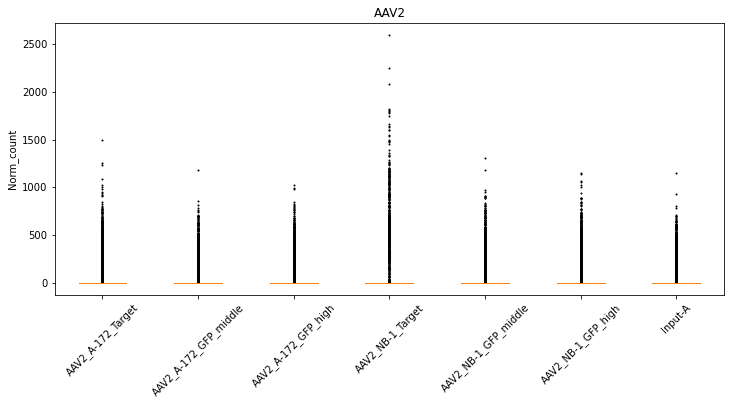

In [97]:
# AAV2_norm
plt.figure(figsize=(12, 5))
flierprops = dict(markersize=1)
plt.boxplot(df_cnt_norm.iloc[:, 2:], labels=df_cnt_norm.iloc[:, 2:].columns, flierprops=flierprops)
plt.xticks(rotation=45)
plt.title('AAV2')
plt.ylabel('Norm_count')
plt.show()

In [98]:
df_cnt_norm.describe()

AAV2_A-172_Target  AAV2_A-172_GFP_middle  AAV2_A-172_GFP_high  \
count       76610.000000           76610.000000         76610.000000   
mean            5.738369               5.738369             5.738369   
std            44.027990              39.515870            40.740694   
min             0.000000               0.000000             0.000000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max          1497.812688            1175.842708          1021.670794   

       AAV2_NB-1_Target  AAV2_NB-1_GFP_middle  AAV2_NB-1_GFP_high  \
count      76610.000000          76610.000000        76610.000000   
mean           5.738369              5.738369            5.738369   
std           66.704122             43.177654           43.859563   
min            0.000000              0.000000            0.000000   
25%            0.000000              0.000000            0.000000   
50%            0.000000              0.000000            0.000000   
75%            0.000000              0.000000            0.000000   
max         2592.750175           1311.582925         1147.945910   

            Input-A  
count  76610.000000  
mean       5.738369  
std       39.357544  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     1144.744599

In [99]:
file = 'A:/PROJECT/PG4874/200_INFO/02_cnt/AAV2.count.txt'
df_cnt = pd.read_csv(file, sep='\t')

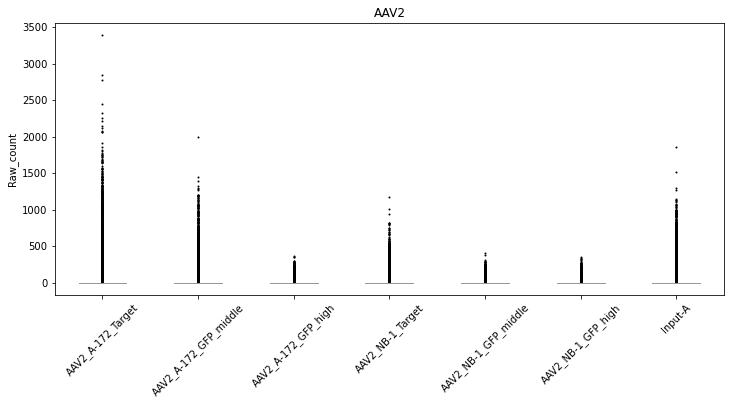

In [100]:
# raw count
plt.figure(figsize=(12, 5))
flierprops = dict(markersize=1)
plt.boxplot(df_cnt.iloc[:, 2:], labels=df_cnt.iloc[:, 2:].columns, flierprops=flierprops)
plt.xticks(rotation=45)
plt.title('AAV2')
plt.ylabel('Raw_count')
plt.show()

In [101]:
df_cnt.describe()

AAV2_A-172_Target  AAV2_A-172_GFP_middle  AAV2_A-172_GFP_high  \
count       76610.000000           76610.000000         76610.000000   
mean           12.972327               9.760436             2.021995   
std            99.530987              67.212851            14.355554   
min             0.000000               0.000000             0.000000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max          3386.000000            2000.000000           360.000000   

       AAV2_NB-1_Target  AAV2_NB-1_GFP_middle  AAV2_NB-1_GFP_high  \
count      76610.000000          76610.000000        76610.000000   
mean           2.587273              1.798186            1.714593   
std           30.075061             13.530228           13.104999   
min            0.000000              0.000000            0.000000   
25%            0.000000              0.000000            0.000000   
50%            0.000000              0.000000            0.000000   
75%            0.000000              0.000000            0.000000   
max         1169.000000            411.000000          343.000000   

            Input-A  
count  76610.000000  
mean       9.313771  
std       63.880028  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     1858.000000

In [93]:
df_cnt_norm.sum()

sgRNA                    4|sgTSPYL4_2|TSPYL44|sgABL2_2|ABL24|sgENTPD2_1...
Gene                     TSPYL4ABL2ENTPD2UBE2L6ZNF254FLI1C1orf105CRYBA4...
AAV2_A-172_Target                                            439616.428571
AAV2_A-172_GFP_middle                                        439616.428571
AAV2_A-172_GFP_high                                          439616.428571
AAV2_NB-1_Target                                             439616.428571
AAV2_NB-1_GFP_middle                                         439616.428571
AAV2_NB-1_GFP_high                                           439616.428571
Input-A                                                      439616.428571
dtype: object

In [102]:
df_cnt.sum()

sgRNA                    4|sgTSPYL4_2|TSPYL44|sgABL2_2|ABL24|sgENTPD2_1...
Gene                     TSPYL4ABL2ENTPD2UBE2L6ZNF254FLI1C1orf105CRYBA4...
AAV2_A-172_Target                                                   993810
AAV2_A-172_GFP_middle                                               747747
AAV2_A-172_GFP_high                                                 154905
AAV2_NB-1_Target                                                    198211
AAV2_NB-1_GFP_middle                                                137759
AAV2_NB-1_GFP_high                                                  131355
Input-A                                                             713528
dtype: object

In [103]:
file = 'A:/PROJECT/PG4874/200_INFO/02_cnt/CereAAV.count_normalized.txt'
df_cnt_norm = pd.read_csv(file, sep='\t')

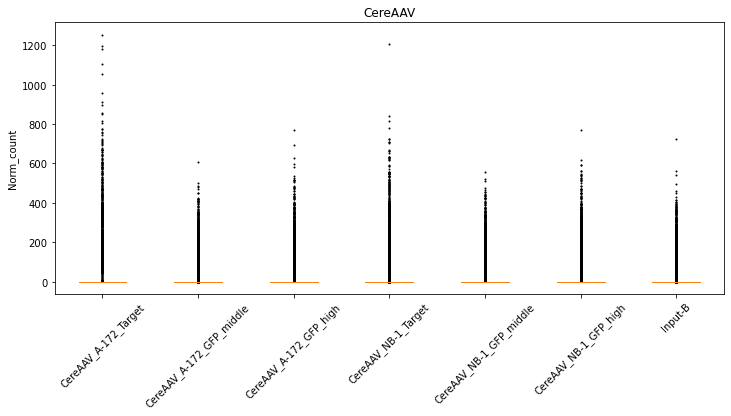

In [104]:
# CereAAV_norm
plt.figure(figsize=(12, 5))
flierprops = dict(markersize=1)
plt.boxplot(df_cnt_norm.iloc[:, 2:], labels=df_cnt_norm.iloc[:, 2:].columns, flierprops=flierprops)
plt.xticks(rotation=45)
plt.title('CereAAV')
plt.ylabel('Norm_count')
plt.show()

In [105]:
df_cnt_norm.describe()

CereAAV_A-172_Target  CereAAV_A-172_GFP_middle  CereAAV_A-172_GFP_high  \
count          76610.000000              76610.000000            76610.000000   
mean               3.503899                  3.503899                3.503899   
std               34.981402                 24.067645               25.773868   
min                0.000000                  0.000000                0.000000   
25%                0.000000                  0.000000                0.000000   
50%                0.000000                  0.000000                0.000000   
75%                0.000000                  0.000000                0.000000   
max             1253.502189                605.871473              769.488647   

       CereAAV_NB-1_Target  CereAAV_NB-1_GFP_middle  CereAAV_NB-1_GFP_high  \
count         76610.000000             76610.000000           76610.000000   
mean              3.503899                 3.503899               3.503899   
std              31.366291                24.257065              26.821194   
min               0.000000                 0.000000               0.000000   
25%               0.000000                 0.000000               0.000000   
50%               0.000000                 0.000000               0.000000   
75%               0.000000                 0.000000               0.000000   
max            1208.295981               555.315065             770.147040   

            Input-B  
count  76610.000000  
mean       3.503899  
std       23.974334  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      721.818983

In [106]:
file = 'A:/PROJECT/PG4874/200_INFO/02_cnt/CereAAV.count.txt'
df_cnt = pd.read_csv(file, sep='\t')

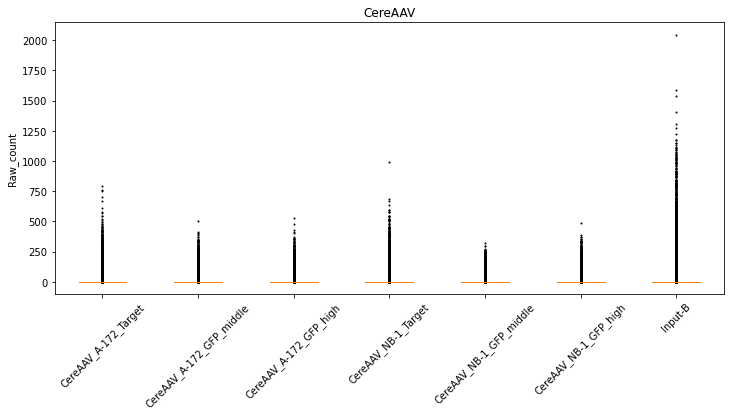

In [107]:
# CereAAV count
plt.figure(figsize=(12, 5))
flierprops = dict(markersize=1)
plt.boxplot(df_cnt.iloc[:, 2:], labels=df_cnt.iloc[:, 2:].columns, flierprops=flierprops)
plt.xticks(rotation=45)
plt.title('CereAAV')
plt.ylabel('Raw_count')
plt.show()

In [108]:
df_cnt.describe()

CereAAV_A-172_Target  CereAAV_A-172_GFP_middle  CereAAV_A-172_GFP_high  \
count          76610.000000              76610.000000            76610.000000   
mean               2.225049                  2.897402                2.408824   
std               22.213919                 19.901729               17.718749   
min                0.000000                  0.000000                0.000000   
25%                0.000000                  0.000000                0.000000   
50%                0.000000                  0.000000                0.000000   
75%                0.000000                  0.000000                0.000000   
max              796.000000                501.000000              529.000000   

       CereAAV_NB-1_Target  CereAAV_NB-1_GFP_middle  CereAAV_NB-1_GFP_high  \
count         76610.000000             76610.000000           76610.000000   
mean              2.865070                 2.006500               2.197481   
std              25.647603                13.890757              16.820991   
min               0.000000                 0.000000               0.000000   
25%               0.000000                 0.000000               0.000000   
50%               0.000000                 0.000000               0.000000   
75%               0.000000                 0.000000               0.000000   
max             988.000000               318.000000             483.000000   

            Input-B  
count  76610.000000  
mean       9.926968  
std       67.922173  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     2045.000000

In [109]:
df_cnt_norm.sum()

sgRNA                       4|sgNINL_1|NINL4|sgLONP1_3|LONP14|sgLYSMD2_1|L...
Gene                        NINLLONP1LYSMD2PRKCQCTDNEP1P2RY1PUS3ROR2ALKBH2...
CereAAV_A-172_Target                                            268433.714286
CereAAV_A-172_GFP_middle                                        268433.714286
CereAAV_A-172_GFP_high                                          268433.714286
CereAAV_NB-1_Target                                             268433.714286
CereAAV_NB-1_GFP_middle                                         268433.714286
CereAAV_NB-1_GFP_high                                           268433.714286
Input-B                                                         268433.714286
dtype: object

In [110]:
df_cnt.sum()

sgRNA                       4|sgNINL_1|NINL4|sgLONP1_3|LONP14|sgLYSMD2_1|L...
Gene                        NINLLONP1LYSMD2PRKCQCTDNEP1P2RY1PUS3ROR2ALKBH2...
CereAAV_A-172_Target                                                   170461
CereAAV_A-172_GFP_middle                                               221970
CereAAV_A-172_GFP_high                                                 184540
CereAAV_NB-1_Target                                                    219493
CereAAV_NB-1_GFP_middle                                                153718
CereAAV_NB-1_GFP_high                                                  168349
Input-B                                                                760505
dtype: object

In [111]:
file = 'A:/PROJECT/PG4874/200_INFO/02_cnt/NB-1_KO.count_normalized.txt'
df_cnt_norm = pd.read_csv(file, sep='\t')

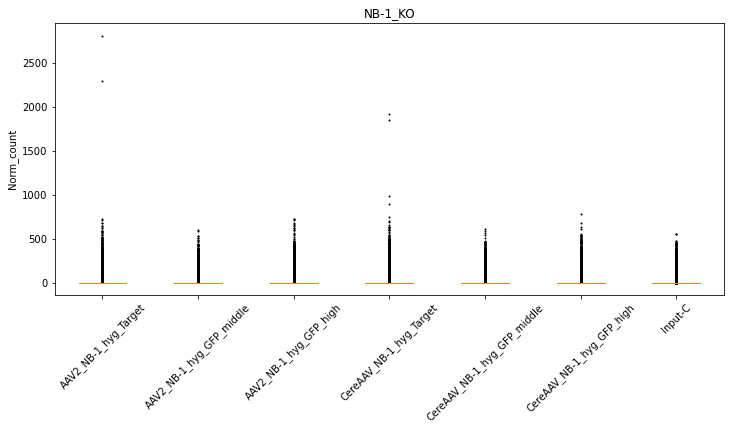

In [113]:
# NB-1_KO_norm
plt.figure(figsize=(12, 5))
flierprops = dict(markersize=1)
plt.boxplot(df_cnt_norm.iloc[:, 2:], labels=df_cnt_norm.iloc[:, 2:].columns, flierprops=flierprops)
plt.xticks(rotation=45)
plt.title('NB-1_KO')
plt.ylabel('Norm_count')
plt.show()

In [114]:
file = 'A:/PROJECT/PG4874/200_INFO/02_cnt/NB-1_KO.count.txt'
df_cnt = pd.read_csv(file, sep='\t')

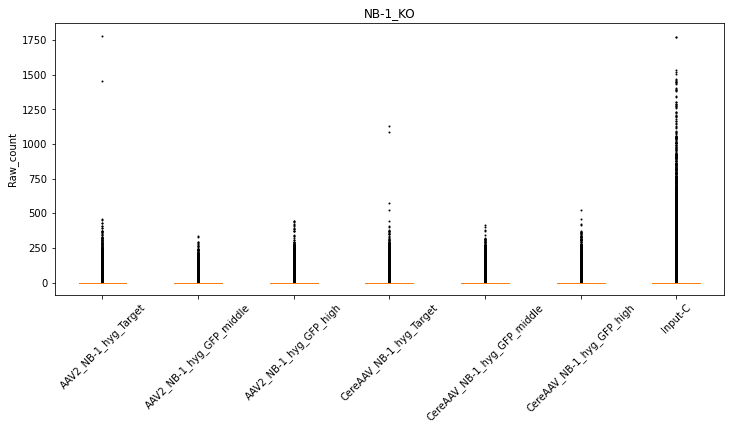

In [115]:
# NB-1_KO count
plt.figure(figsize=(12, 5))
flierprops = dict(markersize=1)
plt.boxplot(df_cnt.iloc[:, 2:], labels=df_cnt.iloc[:, 2:].columns, flierprops=flierprops)
plt.xticks(rotation=45)
plt.title('NB-1_KO')
plt.ylabel('Raw_count')
plt.show()

In [116]:
df_cnt_norm.describe()

AAV2_NB-1_hyg_Target  AAV2_NB-1_hyg_GFP_middle  AAV2_NB-1_hyg_GFP_high  \
count          76610.000000              76610.000000            76610.000000   
mean               3.337321                  3.337321                3.337321   
std               29.915410                 23.736275               26.569089   
min                0.000000                  0.000000                0.000000   
25%                0.000000                  0.000000                0.000000   
50%                0.000000                  0.000000                0.000000   
75%                0.000000                  0.000000                0.000000   
max             2808.303900                603.267909              722.843890   

       CereAAV_NB-1_hyg_Target  CereAAV_NB-1_hyg_GFP_middle  \
count             76610.000000                 76610.000000   
mean                  3.337321                     3.337321   
std                  29.396213                    24.103290   
min                   0.000000                     0.000000   
25%                   0.000000                     0.000000   
50%                   0.000000                     0.000000   
75%                   0.000000                     0.000000   
max                1921.669858                   608.338336   

       CereAAV_NB-1_hyg_GFP_high       Input-C  
count               76610.000000  76610.000000  
mean                    3.337321      3.337321  
std                    25.595363     23.604969  
min                     0.000000      0.000000  
25%                     0.000000      0.000000  
50%                     0.000000      0.000000  
75%                     0.000000      0.000000  
max                   778.007445    547.886065

In [117]:
df_cnt.describe()

AAV2_NB-1_hyg_Target  AAV2_NB-1_hyg_GFP_middle  AAV2_NB-1_hyg_GFP_high  \
count          76610.000000              76610.000000            76610.000000   
mean               2.120063                  1.853244                2.068385   
std               19.004030                 13.180963               16.466836   
min                0.000000                  0.000000                0.000000   
25%                0.000000                  0.000000                0.000000   
50%                0.000000                  0.000000                0.000000   
75%                0.000000                  0.000000                0.000000   
max             1784.000000                335.000000              448.000000   

       CereAAV_NB-1_hyg_Target  CereAAV_NB-1_hyg_GFP_middle  \
count             76610.000000                 76610.000000   
mean                  1.964182                     2.276674   
std                  17.301160                    16.442931   
min                   0.000000                     0.000000   
25%                   0.000000                     0.000000   
50%                   0.000000                     0.000000   
75%                   0.000000                     0.000000   
max                1131.000000                   415.000000   

       CereAAV_NB-1_hyg_GFP_high       Input-C  
count               76610.000000  76610.000000  
mean                    2.260606     10.818092  
std                    17.337567     76.516683  
min                     0.000000      0.000000  
25%                     0.000000      0.000000  
50%                     0.000000      0.000000  
75%                     0.000000      0.000000  
max                   527.000000   1776.000000

In [118]:
df_cnt_norm.sum()

sgRNA                          4|sgTCF7L2_4|TCF7L24|sgHELQ_1|HELQ4|sgNKX6-2_4...
Gene                           TCF7L2HELQNKX6-2KRTCAP2LONP1KIAA0100PROK2NFATC...
AAV2_NB-1_hyg_Target                                               255672.142857
AAV2_NB-1_hyg_GFP_middle                                           255672.142857
AAV2_NB-1_hyg_GFP_high                                             255672.142857
CereAAV_NB-1_hyg_Target                                            255672.142857
CereAAV_NB-1_hyg_GFP_middle                                        255672.142857
CereAAV_NB-1_hyg_GFP_high                                          255672.142857
Input-C                                                            255672.142857
dtype: object

In [119]:
df_cnt.sum()

sgRNA                          4|sgTCF7L2_4|TCF7L24|sgHELQ_1|HELQ4|sgNKX6-2_4...
Gene                           TCF7L2HELQNKX6-2KRTCAP2LONP1KIAA0100PROK2NFATC...
AAV2_NB-1_hyg_Target                                                      162418
AAV2_NB-1_hyg_GFP_middle                                                  141977
AAV2_NB-1_hyg_GFP_high                                                    158459
CereAAV_NB-1_hyg_Target                                                   150476
CereAAV_NB-1_hyg_GFP_middle                                               174416
CereAAV_NB-1_hyg_GFP_high                                                 173185
Input-C                                                                   828774
dtype: object

In [197]:
# excelとしてoutput

infiles = 'A:/PROJECT/PG4874/200_INFO/02_cnt/*txt'
outdir = 'A:/PROJECT/PG4874/200_INFO/02_cnt'

for file in glob.glob(infiles):
    df = pd.read_csv(file, sep='\t')
    prefix, _ = os.path.splitext(os.path.basename(file))
    outfile = os.path.join(outdir, prefix + '.xlsx')
    df.to_excel(outfile, index=False) 

## Inputに対する頻度を算出
(1) No.19-23（Input）の総バラエティーに対する、No.1-6 それぞれの頻度 <br>
(2) No.24-28（Input）の総バラエティーに対する、No.7-12 それぞれの頻度 <br>
(3) No.29-33（Input）の総バラエティーに対する、No.13-18 それぞれの頻度 <br>

```bash
[uchiyamat@gifu: /NGSWORK/PROJECT/PG4874/200_INFO]$ mkdir -p 03_freq
```

In [120]:
# input
file = 'A:/PROJECT/PG4874/200_INFO/02_cnt/AAV2.count_normalized.txt'
df_norm_AAV = pd.read_csv(file, sep='\t')

file = 'A:/PROJECT/PG4874/200_INFO/02_cnt/CereAAV.count_normalized.txt'
df_norm_CereAAV = pd.read_csv(file, sep='\t')

file = 'A:/PROJECT/PG4874/200_INFO/02_cnt/NB-1_KO.count_normalized.txt'
df_norm_NB1 = pd.read_csv(file, sep='\t')

In [121]:
df_norm_AAV.head()

sgRNA    Gene  AAV2_A-172_Target  AAV2_A-172_GFP_middle  \
0  4|sgTSPYL4_2|TSPYL4  TSPYL4         447.662859             356.868262   
1      4|sgABL2_2|ABL2    ABL2         439.700476             406.253656   
2  4|sgENTPD2_1|ENTPD2  ENTPD2         241.083259             119.935956   
3  4|sgUBE2L6_3|UBE2L6  UBE2L6         207.464309              91.715731   
4  4|sgZNF254_4|ZNF254  ZNF254         294.608166             291.021070   

   AAV2_A-172_GFP_high  AAV2_NB-1_Target  AAV2_NB-1_GFP_middle  \
0           349.070854          0.000000            357.414325   
1           329.205033       1046.858925            277.634342   
2            99.329105       1115.614489            191.471960   
3            65.273412          0.000000             41.485591   
4           255.417698        483.506876            114.883176   

   AAV2_NB-1_GFP_high     Input-A  
0          237.621457  332.702951  
1          234.274675  358.579848  
2          167.339054  141.090696  
3          123.830900   96.730303  
4          224.234332  283.413625

In [128]:
# AAV2
# inputのカウント値が0のsgRNAの頻度は0に変換
cols = df_norm_AAV.iloc[:, 2:-1].columns
for col in cols:
    freq = col + "_freq"
    df_norm_AAV[freq] = df_norm_AAV[col] / df_norm_AAV['Input-A']
    
df_norm_AAV_mod = df_norm_AAV.fillna(0).replace([np.inf, -np.inf], 0)

In [144]:
df_norm_AAV_mod.describe()

AAV2_A-172_Target  AAV2_A-172_GFP_middle  AAV2_A-172_GFP_high  \
count       76610.000000           76610.000000         76610.000000   
mean            5.738369               5.738369             5.738369   
std            44.027990              39.515870            40.740694   
min             0.000000               0.000000             0.000000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max          1497.812688            1175.842708          1021.670794   

       AAV2_NB-1_Target  AAV2_NB-1_GFP_middle  AAV2_NB-1_GFP_high  \
count      76610.000000          76610.000000        76610.000000   
mean           5.738369              5.738369            5.738369   
std           66.704122             43.177654           43.859563   
min            0.000000              0.000000            0.000000   
25%            0.000000              0.000000            0.000000   
50%            0.000000              0.000000            0.000000   
75%            0.000000              0.000000            0.000000   
max         2592.750175           1311.582925         1147.945910   

            Input-A  AAV2_A-172_Target_freq  AAV2_A-172_GFP_middle_freq  \
count  76610.000000            76610.000000                76610.000000   
mean       5.738369                0.040052                    0.042358   
std       39.357544                0.460876                    0.358009   
min        0.000000                0.000000                    0.000000   
25%        0.000000                0.000000                    0.000000   
50%        0.000000                0.000000                    0.000000   
75%        0.000000                0.000000                    0.000000   
max     1144.744599               59.591697                   49.620334   

       AAV2_A-172_GFP_high_freq  AAV2_NB-1_Target_freq  \
count              76610.000000           76610.000000   
mean                   0.040810               0.045022   
std                    0.406903               1.221575   
min                    0.000000               0.000000   
25%                    0.000000               0.000000   
50%                    0.000000               0.000000   
75%                    0.000000               0.000000   
max                   46.062296             245.989106   

       AAV2_NB-1_GFP_middle_freq  AAV2_NB-1_GFP_high_freq  
count               76610.000000             76610.000000  
mean                    0.043350                 0.042590  
std                     0.807224                 0.579739  
min                     0.000000                 0.000000  
25%                     0.000000                 0.000000  
50%                     0.000000                 0.000000  
75%                     0.000000                 0.000000  
max                   165.745222                67.900727

In [146]:
# CereAAV
# inputのカウント値が0のsgRNAの頻度は0に変換
cols = df_norm_CereAAV.iloc[:, 2:-1].columns
for col in cols:
    freq = col + "_freq"
    df_norm_CereAAV[freq] = df_norm_CereAAV[col] / df_norm_CereAAV['Input-B']
    
df_norm_CereAAV_mod = df_norm_CereAAV.fillna(0).replace([np.inf, -np.inf], 0)

In [147]:
df_norm_CereAAV_mod.describe()

CereAAV_A-172_Target  CereAAV_A-172_GFP_middle  CereAAV_A-172_GFP_high  \
count          76610.000000              76610.000000            76610.000000   
mean               3.503899                  3.503899                3.503899   
std               34.981402                 24.067645               25.773868   
min                0.000000                  0.000000                0.000000   
25%                0.000000                  0.000000                0.000000   
50%                0.000000                  0.000000                0.000000   
75%                0.000000                  0.000000                0.000000   
max             1253.502189                605.871473              769.488647   

       CereAAV_NB-1_Target  CereAAV_NB-1_GFP_middle  CereAAV_NB-1_GFP_high  \
count         76610.000000             76610.000000           76610.000000   
mean              3.503899                 3.503899               3.503899   
std              31.366291                24.257065              26.821194   
min               0.000000                 0.000000               0.000000   
25%               0.000000                 0.000000               0.000000   
50%               0.000000                 0.000000               0.000000   
75%               0.000000                 0.000000               0.000000   
max            1208.295981               555.315065             770.147040   

            Input-B  CereAAV_A-172_Target_freq  CereAAV_A-172_GFP_middle_freq  \
count  76610.000000               76610.000000                   76610.000000   
mean       3.503899                   0.036747                       0.040202   
std       23.974334                   0.509929                       0.292890   
min        0.000000                   0.000000                       0.000000   
25%        0.000000                   0.000000                       0.000000   
50%        0.000000                   0.000000                       0.000000   
75%        0.000000                   0.000000                       0.000000   
max      721.818983                  47.667182                      25.696209   

       CereAAV_A-172_GFP_high_freq  CereAAV_NB-1_Target_freq  \
count                 76610.000000              76610.000000   
mean                      0.037759                  0.036545   
std                       0.429133                  0.498029   
min                       0.000000                  0.000000   
25%                       0.000000                  0.000000   
50%                       0.000000                  0.000000   
75%                       0.000000                  0.000000   
max                      86.542782                 60.257839   

       CereAAV_NB-1_GFP_middle_freq  CereAAV_NB-1_GFP_high_freq  
count                  76610.000000                76610.000000  
mean                       0.041103                    0.039798  
std                        0.345266                    0.616848  
min                        0.000000                    0.000000  
25%                        0.000000                    0.000000  
50%                        0.000000                    0.000000  
75%                        0.000000                    0.000000  
max                       29.684422                  135.522932

In [148]:
# NB1-KO
# inputのカウント値が0のsgRNAの頻度は0に変換
cols = df_norm_NB1.iloc[:, 2:-1].columns
for col in cols:
    freq = col + "_freq"
    df_norm_NB1[freq] = df_norm_NB1[col] / df_norm_NB1['Input-C']
    
df_norm_NB1_mod = df_norm_NB1.fillna(0).replace([np.inf, -np.inf], 0)

In [149]:
df_norm_NB1_mod.describe()

AAV2_NB-1_hyg_Target  AAV2_NB-1_hyg_GFP_middle  AAV2_NB-1_hyg_GFP_high  \
count          76610.000000              76610.000000            76610.000000   
mean               3.337321                  3.337321                3.337321   
std               29.915410                 23.736275               26.569089   
min                0.000000                  0.000000                0.000000   
25%                0.000000                  0.000000                0.000000   
50%                0.000000                  0.000000                0.000000   
75%                0.000000                  0.000000                0.000000   
max             2808.303900                603.267909              722.843890   

       CereAAV_NB-1_hyg_Target  CereAAV_NB-1_hyg_GFP_middle  \
count             76610.000000                 76610.000000   
mean                  3.337321                     3.337321   
std                  29.396213                    24.103290   
min                   0.000000                     0.000000   
25%                   0.000000                     0.000000   
50%                   0.000000                     0.000000   
75%                   0.000000                     0.000000   
max                1921.669858                   608.338336   

       CereAAV_NB-1_hyg_GFP_high       Input-C  AAV2_NB-1_hyg_Target_freq  \
count               76610.000000  76610.000000               76610.000000   
mean                    3.337321      3.337321                   0.038721   
std                    25.595363     23.604969                   0.556983   
min                     0.000000      0.000000                   0.000000   
25%                     0.000000      0.000000                   0.000000   
50%                     0.000000      0.000000                   0.000000   
75%                     0.000000      0.000000                   0.000000   
max                   778.007445    547.886065                  99.503091   

       AAV2_NB-1_hyg_GFP_middle_freq  AAV2_NB-1_hyg_GFP_high_freq  \
count                   76610.000000                 76610.000000   
mean                        0.043741                     0.039956   
std                         0.452001                     0.643403   
min                         0.000000                     0.000000   
25%                         0.000000                     0.000000   
50%                         0.000000                     0.000000   
75%                         0.000000                     0.000000   
max                        40.861675                   146.445907   

       CereAAV_NB-1_hyg_Target_freq  CereAAV_NB-1_hyg_GFP_middle_freq  \
count                  76610.000000                      76610.000000   
mean                       0.042093                          0.042229   
std                        0.598384                          0.428639   
min                        0.000000                          0.000000   
25%                        0.000000                          0.000000   
50%                        0.000000                          0.000000   
75%                        0.000000                          0.000000   
max                       69.320829                         47.517086   

       CereAAV_NB-1_hyg_GFP_high_freq  
count                    76610.000000  
mean                         0.043502  
std                          0.836873  
min                          0.000000  
25%                          0.000000  
50%                          0.000000  
75%                          0.000000  
max                        191.419349

In [150]:
# output
file = 'A:/PROJECT/PG4874/200_INFO/03_freq/AAV2_sgRNA_norm_table.xlsx'
df_norm_AAV_mod.to_excel(file, index=False)

file = 'A:/PROJECT/PG4874/200_INFO/03_freq/CereAAV_sgRNA_norm_table.xlsx'
df_norm_CereAAV_mod.to_excel(file, index=False)

file = 'A:/PROJECT/PG4874/200_INFO/03_freq/NB-1_KO_sgRNA_norm_table.xlsx'
df_norm_NB1_mod.to_excel(file, index=False)

In [239]:
df_norm_AAV_mod.head()

sgRNA    Gene  AAV2_A-172_Target  AAV2_A-172_GFP_middle  \
0  4|sgTSPYL4_2|TSPYL4  TSPYL4         447.662859             356.868262   
1      4|sgABL2_2|ABL2    ABL2         439.700476             406.253656   
2  4|sgENTPD2_1|ENTPD2  ENTPD2         241.083259             119.935956   
3  4|sgUBE2L6_3|UBE2L6  UBE2L6         207.464309              91.715731   
4  4|sgZNF254_4|ZNF254  ZNF254         294.608166             291.021070   

   AAV2_A-172_GFP_high  AAV2_NB-1_Target  AAV2_NB-1_GFP_middle  \
0           349.070854          0.000000            357.414325   
1           329.205033       1046.858925            277.634342   
2            99.329105       1115.614489            191.471960   
3            65.273412          0.000000             41.485591   
4           255.417698        483.506876            114.883176   

   AAV2_NB-1_GFP_high     Input-A  AAV2_A-172_Target_freq  \
0          237.621457  332.702951                1.345533   
1          234.274675  358.579848                1.226228   
2          167.339054  141.090696                1.708711   
3          123.830900   96.730303                2.144771   
4          224.234332  283.413625                1.039499   

   AAV2_A-172_GFP_middle_freq  AAV2_A-172_GFP_high_freq  \
0                    1.072633                  1.049197   
1                    1.132952                  0.918080   
2                    0.850063                  0.704009   
3                    0.948159                  0.674798   
4                    1.026842                  0.901219   

   AAV2_NB-1_Target_freq  AAV2_NB-1_GFP_middle_freq  AAV2_NB-1_GFP_high_freq  
0               0.000000                   1.074275                 0.714215  
1               2.919458                   0.774261                 0.653340  
2               7.907073                   1.357084                 1.186039  
3               0.000000                   0.428879                 1.280167  
4               1.706011                   0.405355                 0.791191

# 遺伝子単位の頻度を考える (230210)

In [2]:
file = '/Users/tomoyauchiyama/code/CNN/test/AAV2.count_normalized.txt'
df_norm_AAV = pd.read_csv(file, sep='\t')

In [3]:
df_norm_AAV.head()

sgRNA    Gene  AAV2_A-172_Target  AAV2_A-172_GFP_middle  \
0  4|sgTSPYL4_2|TSPYL4  TSPYL4         447.662859             356.868262   
1      4|sgABL2_2|ABL2    ABL2         439.700476             406.253656   
2  4|sgENTPD2_1|ENTPD2  ENTPD2         241.083259             119.935956   
3  4|sgUBE2L6_3|UBE2L6  UBE2L6         207.464309              91.715731   
4  4|sgZNF254_4|ZNF254  ZNF254         294.608166             291.021070   

   AAV2_A-172_GFP_high  AAV2_NB-1_Target  AAV2_NB-1_GFP_middle  \
0           349.070854          0.000000            357.414325   
1           329.205033       1046.858925            277.634342   
2            99.329105       1115.614489            191.471960   
3            65.273412          0.000000             41.485591   
4           255.417698        483.506876            114.883176   

   AAV2_NB-1_GFP_high     Input-A  
0          237.621457  332.702951  
1          234.274675  358.579848  
2          167.339054  141.090696  
3          123.830900   96.730303  
4          224.234332  283.413625

In [4]:
cols = df_norm_AAV.columns.to_list()
df_AAV2_cnt = df_norm_AAV[cols].astype(str)
sample_cols =  df_norm_AAV.iloc[:, 2:].columns.to_list()
df_AAV2_agg = df_AAV2_cnt.groupby('Gene')[sample_cols].agg(','.join).reset_index()

In [5]:
df_AAV2_agg.head()

Gene AAV2_A-172_Target          AAV2_A-172_GFP_middle  \
0     A1BG   0.0,0.0,0.0,0.0                0.0,0.0,0.0,0.0   
1     A1CF   0.0,0.0,0.0,0.0                0.0,0.0,0.0,0.0   
2      A2M   0.0,0.0,0.0,0.0                0.0,0.0,0.0,0.0   
3    A2ML1   0.0,0.0,0.0,0.0                0.0,0.0,0.0,0.0   
4  A3GALT2   0.0,0.0,0.0,0.0  268.0921373520341,0.0,0.0,0.0   

             AAV2_A-172_GFP_high AAV2_NB-1_Target  \
0                0.0,0.0,0.0,0.0  0.0,0.0,0.0,0.0   
1                0.0,0.0,0.0,0.0  0.0,0.0,0.0,0.0   
2                0.0,0.0,0.0,0.0  0.0,0.0,0.0,0.0   
3                0.0,0.0,0.0,0.0  0.0,0.0,0.0,0.0   
4  258.2556728317356,0.0,0.0,0.0  0.0,0.0,0.0,0.0   

            AAV2_NB-1_GFP_middle              AAV2_NB-1_GFP_high  \
0                0.0,0.0,0.0,0.0                 0.0,0.0,0.0,0.0   
1                0.0,0.0,0.0,0.0                 0.0,0.0,0.0,0.0   
2                0.0,0.0,0.0,0.0                 0.0,0.0,0.0,0.0   
3                0.0,0.0,0.0,0.0                 0.0,0.0,0.0,0.0   
4  370.1791223389087,0.0,0.0,0.0  170.68583500546504,0.0,0.0,0.0   

                         Input-A  
0                0.0,0.0,0.0,0.0  
1                0.0,0.0,0.0,0.0  
2                0.0,0.0,0.0,0.0  
3                0.0,0.0,0.0,0.0  
4  192.8444884333301,0.0,0.0,0.0

In [119]:
file = '/Users/tomoyauchiyama/code/CNN/test/CereAAV.count_normalized.txt'
df_norm_CereAAV = pd.read_csv(file, sep='\t')

cols = df_norm_CereAAV.columns.to_list()
df_CereAAV_cnt = df_norm_CereAAV[cols].astype(str)
sample_cols =  df_norm_CereAAV.iloc[:, 2:].columns.to_list()
df_CereAAV_agg = df_CereAAV_cnt.groupby('Gene')[sample_cols].agg(','.join).reset_index()

In [120]:
file = '/Users/tomoyauchiyama/code/CNN/test/NB-1_KO.count_normalized.txt'
df_norm_NB1 = pd.read_csv(file, sep='\t')

cols = df_norm_NB1.columns.to_list()
df_NB1_cnt = df_norm_NB1[cols].astype(str)
sample_cols =  df_norm_NB1.iloc[:, 2:].columns.to_list()
df_NB1_agg = df_NB1_cnt.groupby('Gene')[sample_cols].agg(','.join).reset_index()

In [9]:
df_NB1_agg.head()

Gene           AAV2_NB-1_hyg_Target       AAV2_NB-1_hyg_GFP_middle  \
0     A1BG                0.0,0.0,0.0,0.0                0.0,0.0,0.0,0.0   
1     A1CF                0.0,0.0,0.0,0.0                0.0,0.0,0.0,0.0   
2      A2M                0.0,0.0,0.0,0.0                0.0,0.0,0.0,0.0   
3    A2ML1                0.0,0.0,0.0,0.0                0.0,0.0,0.0,0.0   
4  A3GALT2  78.70806895083761,0.0,0.0,0.0  117.0519822627206,0.0,0.0,0.0   

           AAV2_NB-1_hyg_GFP_high         CereAAV_NB-1_hyg_Target  \
0                 0.0,0.0,0.0,0.0                 0.0,0.0,0.0,0.0   
1                 0.0,0.0,0.0,0.0                 0.0,0.0,0.0,0.0   
2                 0.0,0.0,0.0,0.0                 0.0,0.0,0.0,0.0   
3                 0.0,0.0,0.0,0.0                 0.0,0.0,0.0,0.0   
4  132.30624776305365,0.0,0.0,0.0  214.08523618384328,0.0,0.0,0.0   

     CereAAV_NB-1_hyg_GFP_middle       CereAAV_NB-1_hyg_GFP_high  \
0                0.0,0.0,0.0,0.0                 0.0,0.0,0.0,0.0   
1                0.0,0.0,0.0,0.0                 0.0,0.0,0.0,0.0   
2                0.0,0.0,0.0,0.0                 0.0,0.0,0.0,0.0   
3                0.0,0.0,0.0,0.0                 0.0,0.0,0.0,0.0   
4  68.89614894439566,0.0,0.0,0.0  107.76953216832536,0.0,0.0,0.0   

                          Input-C  
0                 0.0,0.0,0.0,0.0  
1                 0.0,0.0,0.0,0.0  
2                 0.0,0.0,0.0,0.0  
3                 0.0,0.0,0.0,0.0  
4  174.91632821492954,0.0,0.0,0.0

In [20]:
# 1遺伝子につきマッピングカウントされたsgRNA数 (AAV2)
# マッピングされたsgRNAの種類数ごとの遺伝子数をサンプル間で比較
sample_cols =  df_AAV2_agg.iloc[:, 1:].columns.to_list()
df_sgRNA_cnt = pd.DataFrame()
for i in range(len(df_AAV2_agg)):
    sgRNA_cnts = []
    for col in sample_cols:
        gene = df_AAV2_agg.loc[i, 'Gene']
        cnts = df_AAV2_agg.loc[i, col]
        cnt_list = cnts.split(',')
        cnt = 0
        for j in cnt_list:
            if j != '0.0':
                cnt += 1
        sgRNA_cnts.append(cnt)
    cnts_col = pd.Series([gene] + sgRNA_cnts)
    df_sgRNA_cnt = df_sgRNA_cnt.append(cnts_col, ignore_index=True)
df_sgRNA_cnt.columns = df_AAV2_agg.columns
df_AAV2_sgRNA_cnts = df_sgRNA_cnt

In [22]:
print(df_AAV2_sgRNA_cnts.head())
print(df_AAV2_sgRNA_cnts.describe())

      Gene  AAV2_A-172_Target  AAV2_A-172_GFP_middle  AAV2_A-172_GFP_high  \
0     A1BG                0.0                    0.0                  0.0   
1     A1CF                0.0                    0.0                  0.0   
2      A2M                0.0                    0.0                  0.0   
3    A2ML1                0.0                    0.0                  0.0   
4  A3GALT2                0.0                    1.0                  1.0   

   AAV2_NB-1_Target  AAV2_NB-1_GFP_middle  AAV2_NB-1_GFP_high  Input-A  
0               0.0                   0.0                 0.0      0.0  
1               0.0                   0.0                 0.0      0.0  
2               0.0                   0.0                 0.0      0.0  
3               0.0                   0.0                 0.0      0.0  
4               0.0                   1.0                 1.0      1.0  
       AAV2_A-172_Target  AAV2_A-172_GFP_middle  AAV2_A-172_GFP_high  \
count       19116.000000   

In [130]:
sample_cols =  df_AAV2_agg.iloc[:, 1:].columns.to_list()
sgRNA_num = pd.DataFrame([0, 1, 2, 3, 4], columns=['sgRNA_num'])
for ii, sample_name in enumerate(sample_cols):
    df = df_AAV2_sgRNA_cnts.groupby(sample_name)['Gene'].agg(','.join).reset_index()
    gene_cnt_list = []
    for i in range(len(sgRNA_num)):
        try:
            gene_cnt = len(df.loc[i, 'Gene'].split(','))
        except:
            gene_cnt = 0
        gene_cnt_list.append(gene_cnt)
    df_cnt = pd.DataFrame(gene_cnt_list, columns=[sample_name])
    if ii == 0:
        df_merge = pd.concat([sgRNA_num, df_cnt], axis=1)
    else:
        df_merge = pd.concat([df_merge, df_cnt], axis=1)

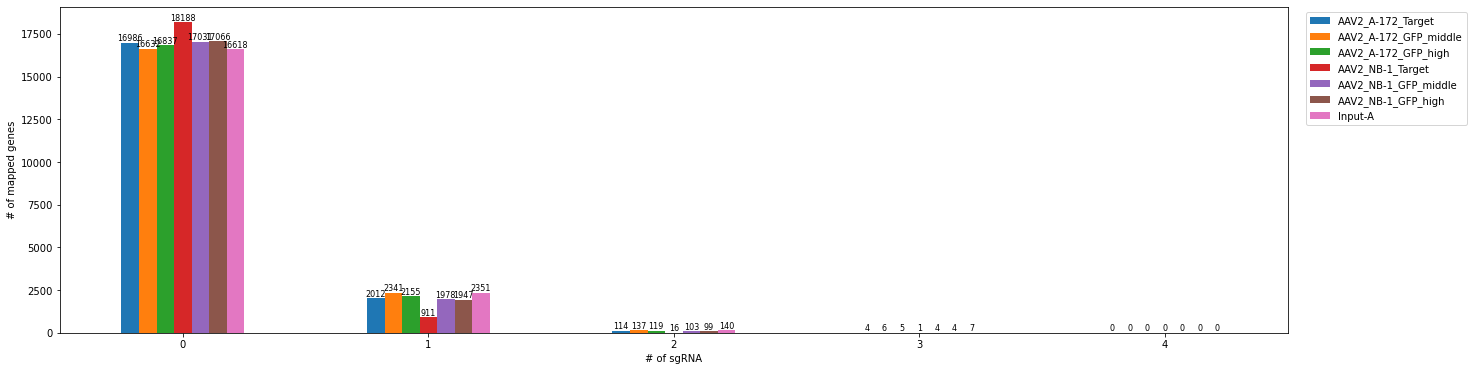

In [131]:
fig, ax = plt.subplots(figsize=(22, 6))

df_merge.iloc[:, 1:].plot.bar(
    ax=ax,
    rot=0,
    xlabel='# of sgRNA',
    ylabel='# of mapped genes'
)
for container in ax.containers:
    ax.bar_label(container, font=dict(size=8))

ax.legend(
    bbox_to_anchor=(1.15, 1),
    loc='upper right',
    fontsize=10
)
plt.show()

In [123]:
# 1遺伝子につきマッピングカウントされたsgRNA数 (CereAAV)
# マッピングされたsgRNAの種類数ごとの遺伝子数をサンプル間で比較
sample_cols =  df_CereAAV_agg.iloc[:, 1:].columns.to_list()
df_sgRNA_cnt = pd.DataFrame()
for i in range(len(df_CereAAV_agg)):
    sgRNA_cnts = []
    for col in sample_cols:
        gene = df_CereAAV_agg.loc[i, 'Gene']
        cnts = df_CereAAV_agg.loc[i, col]
        cnt_list = cnts.split(',')
        cnt = 0
        for j in cnt_list:
            if j != '0.0':
                cnt += 1
        sgRNA_cnts.append(cnt)
    cnts_col = pd.Series([gene] + sgRNA_cnts)
    df_sgRNA_cnt = df_sgRNA_cnt.append(cnts_col, ignore_index=True)
df_sgRNA_cnt.columns = df_CereAAV_agg.columns
df_CereAAV_sgRNA_cnts = df_sgRNA_cnt

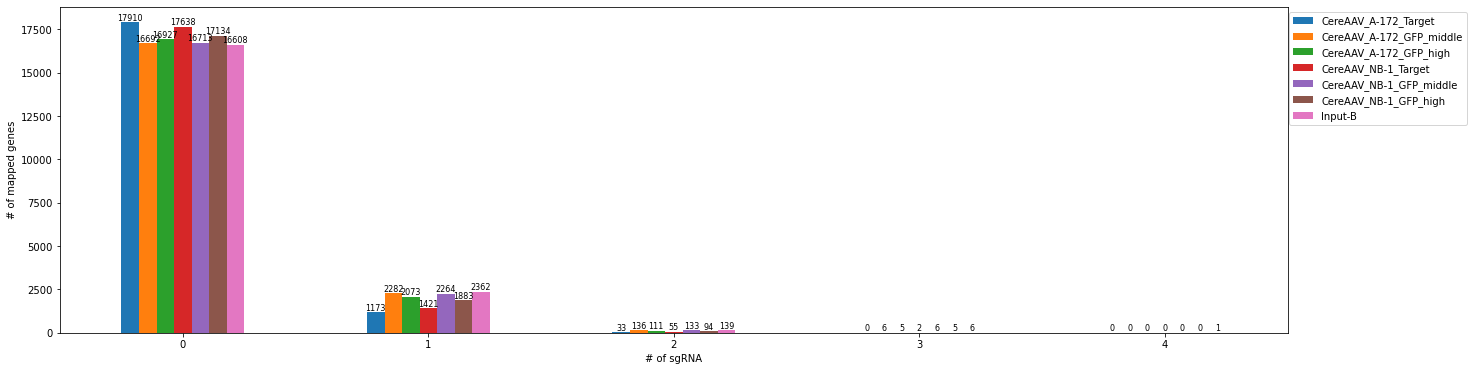

In [132]:
sample_cols =  df_CereAAV_agg.iloc[:, 1:].columns.to_list()
sgRNA_num = pd.DataFrame([0, 1, 2, 3, 4], columns=['sgRNA_num'])
for ii, sample_name in enumerate(sample_cols):
    df = df_CereAAV_sgRNA_cnts.groupby(sample_name)['Gene'].agg(','.join).reset_index()
    gene_cnt_list = []
    for i in range(len(sgRNA_num)):
        try:
            gene_cnt = len(df.loc[i, 'Gene'].split(','))
        except:
            gene_cnt = 0
        gene_cnt_list.append(gene_cnt)
    df_cnt = pd.DataFrame(gene_cnt_list, columns=[sample_name])
    if ii == 0:
        df_merge = pd.concat([sgRNA_num, df_cnt], axis=1)
    else:
        df_merge = pd.concat([df_merge, df_cnt], axis=1)

fig, ax = plt.subplots(figsize=(22, 6))

df_merge.iloc[:, 1:].plot.bar(
    ax=ax,
    rot=0,
    xlabel='# of sgRNA',
    ylabel='# of mapped genes'
)
for container in ax.containers:
    ax.bar_label(container, font=dict(size=8))

ax.legend(
    bbox_to_anchor=(1.15, 1),
    loc='upper right',
    fontsize=10
)
plt.show()

In [133]:
# 1遺伝子につきマッピングカウントされたsgRNA数 (NB-1_KO)
# マッピングされたsgRNAの種類数ごとの遺伝子数をサンプル間で比較
sample_cols =  df_NB1_agg.iloc[:, 1:].columns.to_list()
df_sgRNA_cnt = pd.DataFrame()
for i in range(len(df_NB1_agg)):
    sgRNA_cnts = []
    for col in sample_cols:
        gene = df_NB1_agg.loc[i, 'Gene']
        cnts = df_NB1_agg.loc[i, col]
        cnt_list = cnts.split(',')
        cnt = 0
        for j in cnt_list:
            if j != '0.0':
                cnt += 1
        sgRNA_cnts.append(cnt)
    cnts_col = pd.Series([gene] + sgRNA_cnts)
    df_sgRNA_cnt = df_sgRNA_cnt.append(cnts_col, ignore_index=True)
df_sgRNA_cnt.columns = df_NB1_agg.columns
df_NB1_sgRNA_cnts = df_sgRNA_cnt

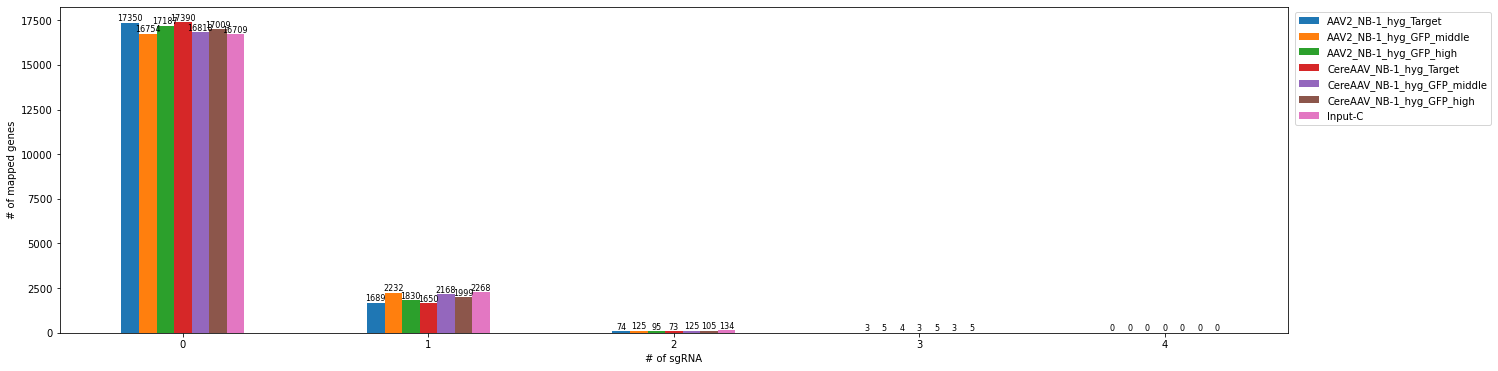

In [135]:
sample_cols =  df_NB1_agg.iloc[:, 1:].columns.to_list()
sgRNA_num = pd.DataFrame([0, 1, 2, 3, 4], columns=['sgRNA_num'])
for ii, sample_name in enumerate(sample_cols):
    df = df_NB1_sgRNA_cnts.groupby(sample_name)['Gene'].agg(','.join).reset_index()
    gene_cnt_list = []
    for i in range(len(sgRNA_num)):
        try:
            gene_cnt = len(df.loc[i, 'Gene'].split(','))
        except:
            gene_cnt = 0
        gene_cnt_list.append(gene_cnt)
    df_cnt = pd.DataFrame(gene_cnt_list, columns=[sample_name])
    if ii == 0:
        df_merge = pd.concat([sgRNA_num, df_cnt], axis=1)
    else:
        df_merge = pd.concat([df_merge, df_cnt], axis=1)

fig, ax = plt.subplots(figsize=(22, 6))

df_merge.iloc[:, 1:].plot.bar(
    ax=ax,
    rot=0,
    xlabel='# of sgRNA',
    ylabel='# of mapped genes'
)
for container in ax.containers:
    ax.bar_label(container, font=dict(size=8))

ax.legend(
    bbox_to_anchor=(1.17, 1),
    loc='upper right',
    fontsize=10
)
plt.show()

In [141]:
import seaborn as sns

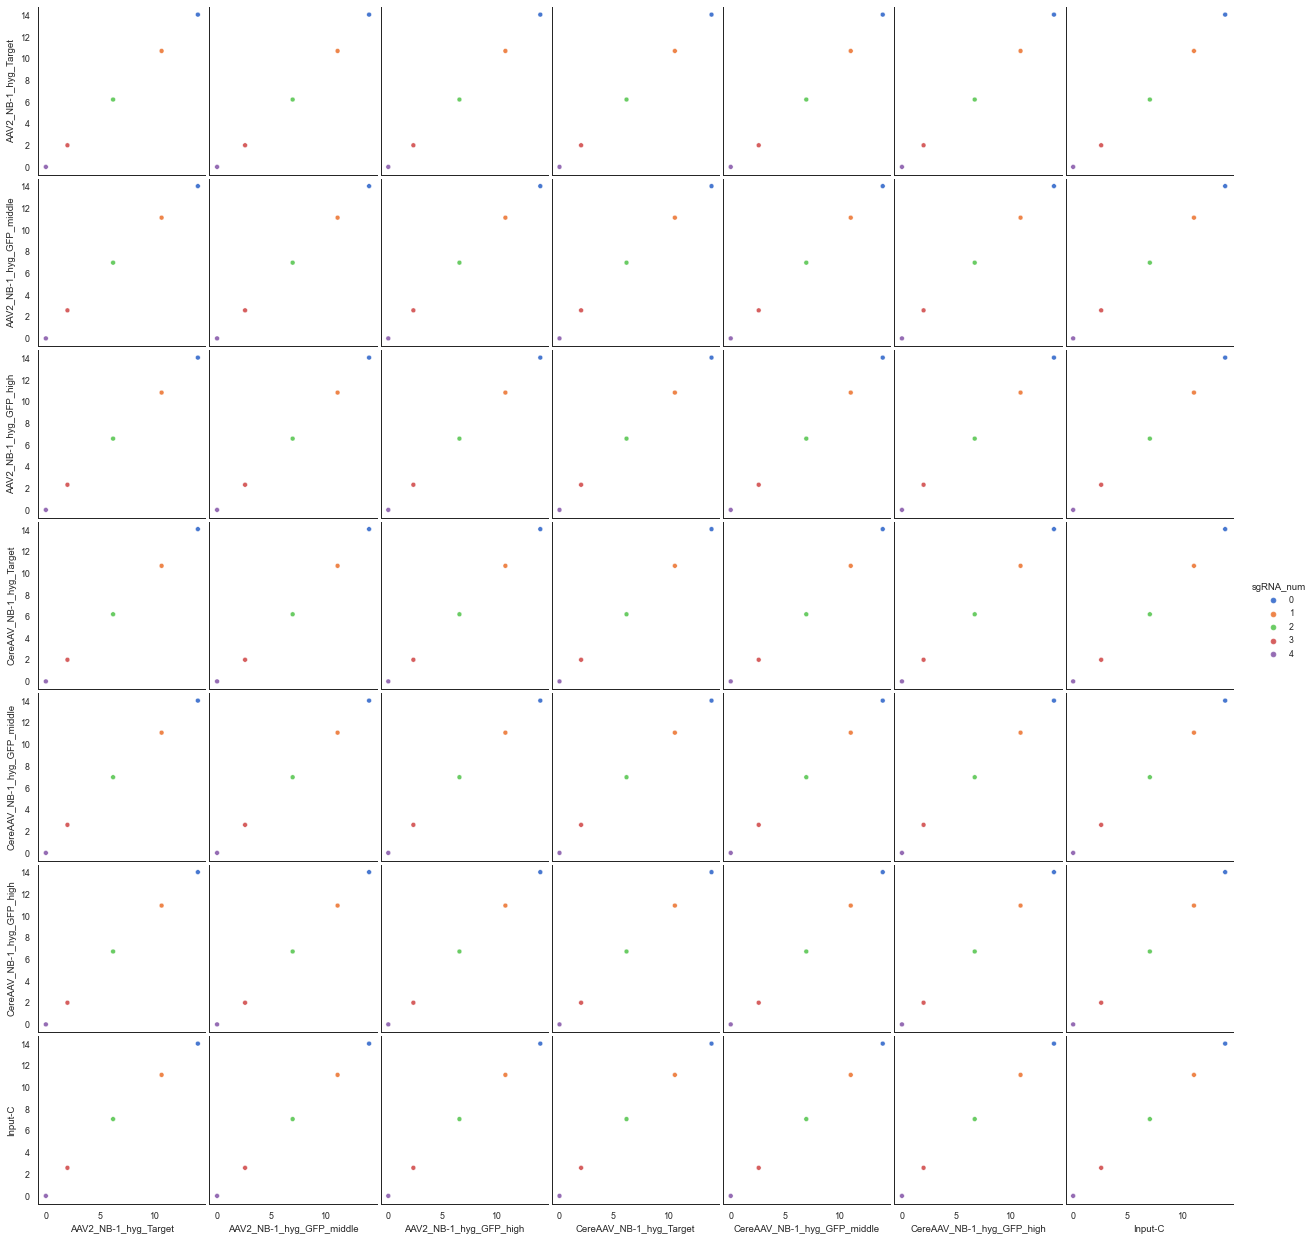

In [158]:
# マッピングされたsgRNAの種類数ごとの遺伝子数を2サンプル間で比較
sns.set_style('white')
sns.set_context("paper", rc={'font.size':8})

df_sctter = pd.concat([df_merge['sgRNA_num'], np.log2(df_merge.iloc[:, 1:]+1)], axis=1)
#g = sns.PairGrid(df_sctter, hue='sgRNA_num', palette='muted', diag_sharey=False, corner=True)
#g.map_lower(sns.scatterplot)
sns.pairplot(df_sctter, hue='sgRNA_num', palette='muted', diag_kind=None)
#g.set_xlabel('log2(gene_num+1)')
#g.set_ylabel('log2(gene_num+1)')

plt.show()

### 4個のsgRNAの総カウント数が1遺伝子におけるカウント数とする。
### 対象サンプルで1遺伝子にマッピングカウントされたsgRNA種類の数はInputでも同じ種類数分マッピングされているので、
### 1遺伝子の頻度の大きさはsgRNAの種類の数の多さに依存していないと考えてもよい。

In [164]:
df_AAV2_sgRNA_cnts.head()

Gene  AAV2_A-172_Target  AAV2_A-172_GFP_middle  AAV2_A-172_GFP_high  \
0     A1BG                0.0                    0.0                  0.0   
1     A1CF                0.0                    0.0                  0.0   
2      A2M                0.0                    0.0                  0.0   
3    A2ML1                0.0                    0.0                  0.0   
4  A3GALT2                0.0                    1.0                  1.0   

   AAV2_NB-1_Target  AAV2_NB-1_GFP_middle  AAV2_NB-1_GFP_high  Input-A  
0               0.0                   0.0                 0.0      0.0  
1               0.0                   0.0                 0.0      0.0  
2               0.0                   0.0                 0.0      0.0  
3               0.0                   0.0                 0.0      0.0  
4               0.0                   1.0                 1.0      1.0

In [174]:
# sgRNAの総和を算出
sample_cols = df_norm_AAV.iloc[:, 2:].columns.to_list()
df_AAV2_sum = df_norm_AAV.groupby('Gene')[sample_cols].agg(sum).reset_index()
df_AAV2_sum.head()

Gene  AAV2_A-172_Target  AAV2_A-172_GFP_middle  AAV2_A-172_GFP_high  \
0     A1BG                0.0               0.000000             0.000000   
1     A1CF                0.0               0.000000             0.000000   
2      A2M                0.0               0.000000             0.000000   
3    A2ML1                0.0               0.000000             0.000000   
4  A3GALT2                0.0             268.092137           258.255673   

   AAV2_NB-1_Target  AAV2_NB-1_GFP_middle  AAV2_NB-1_GFP_high     Input-A  
0               0.0              0.000000            0.000000    0.000000  
1               0.0              0.000000            0.000000    0.000000  
2               0.0              0.000000            0.000000    0.000000  
3               0.0              0.000000            0.000000    0.000000  
4               0.0            370.179122          170.685835  192.844488

In [177]:
# AAV2
# inputのカウント値が0のsgRNAの頻度は0に変換
cols = df_AAV2_sum.iloc[:, 1:-1].columns
df_AAV2_gene_freq = pd.DataFrame()
df_AAV2_gene_freq = pd.DataFrame(df_AAV2_sum['Gene'], columns=['Gene'])
for col in cols:
    freq = col + "_freq"
    df_AAV2_gene_freq[freq] = df_AAV2_sum[col] / df_AAV2_sum['Input-A']

df_AAV2_gene_freq_mod = df_AAV2_gene_freq.fillna(0).replace([np.inf, -np.inf], 0)

In [181]:
df_AAV2_merge = pd.merge(df_AAV2_gene_freq_mod, df_AAV2_sgRNA_cnts, how='left', on='Gene')

In [184]:
df_tmp = df_AAV2_merge[['Gene', 'AAV2_A-172_Target_freq', 'AAV2_A-172_Target']]
df_sel = df_tmp[df_tmp['AAV2_A-172_Target'] != 0]

In [214]:
"""
[touchiyama:16:32:13:@Mac:~/code/CNN/test] $ less NB-1_KO.count_normalized.txt | grep 'CPPED1'
4|sgCPPED1_1|CPPED1	CPPED1	99.17216687805539	118.8527819898394	109.71737619375179	108.74170726798388	77.69140200112703	39.85996395266829	153.63021419935612
4|sgCPPED1_3|CPPED1	CPPED1	0.0	111.64958308136428	125.85228445753883	141.0244016131666	55.70326935929862	16.239244573309303	107.3560532959356
4|sgCPPED1_2|CPPED1	CPPED1	0.0	37.81679426949435	37.11028900671017	44.17631857761845	38.1127632458359	155.01097092704333	74.65564625751843
4|sgCPPED1_4|CPPED1	CPPED1	0	0	0	0	0	0	0
"""

# sampleA_1_freq
freq = 99.17216687805539 / (153.63021419935612 + 107.3560532959356 + 74.65564625751843)
print(f'sampleA_1_freq {freq}')

# sampleB_1_freq
freq = (118.8527819898394 + 125.85228445753883 + 37.11028900671017) / (153.63021419935612 + 107.3560532959356 + 74.65564625751843)
print(f'sampleB_1_freq {freq}')

# sampleA_2_freq
freq = 99.17216687805539 / 153.63021419935612
print(f'sampleA_2_freq {freq}')

# sampleB_2_freq
freq = 118.8527819898394 / 153.63021419935612
print(f'sampleB_2_freq {freq}')

# sampleA_3_freq
freq = 99.17216687805539 / 153.63021419935612
freq_mean = freq / 3
print(f'sampleA_3_freq {freq_mean}')

# sampleB_3_freq
freq = (118.8527819898394 / 153.63021419935612) + (125.85228445753883 / 107.3560532959356) + (37.11028900671017 / 74.65564625751843)
freq_mean = freq / 3
print(f'sampleA_3_freq {freq_mean}')

"""
sampleA_1_freq 0.2954701508199975
sampleB_1_freq 0.8396309993084972

sampleA_3_freq 0.21517504959314407
sampleA_3_freq 0.8143345955209166
"""

ratio = 0.8396309993084972 / 0.2954701508199975
print(ratio)

ratio = 0.8143345955209166 / 0.21517504959314407
print(ratio)

sampleA_1_freq 0.2954701508199975
sampleB_1_freq 0.8396309993084972
sampleA_2_freq 0.6455251487794322
sampleB_2_freq 0.7736289544946656
sampleA_3_freq 0.21517504959314407
sampleA_3_freq 0.8143345955209166
2.8416779054612737
3.7845214724507863


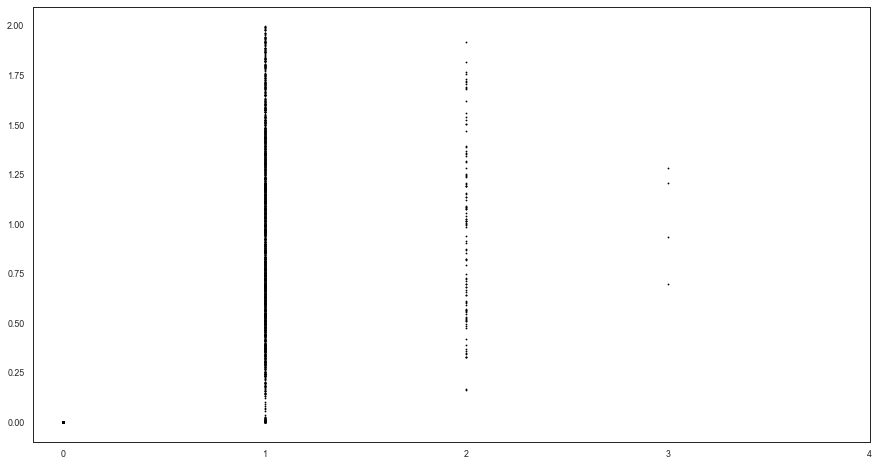

In [206]:
fig, ax = plt.subplots()

cheak_df = df_tmp[df_tmp['AAV2_A-172_Target_freq'] < 2]

ax.scatter(cheak_df['AAV2_A-172_Target'], cheak_df['AAV2_A-172_Target_freq'], color='black', s=1.0)
ax.set_xticks(np.arange(0, 5, step=1))


#ax.set_xlim([0, 4])
#plt.axhline(y=0, color='gray', linestyle='--')
#plt.xlabel('Position')
#plt.ylabel('Contributions(Coefficient magntude)')

plt.show()

# 遺伝子単位での頻度は、inputでカウントされているsgRNAの種類数に基づき算出されている。
# RNA-Seqと違って、リードがgene bodyにランダムに張り付くのではなく、長さの決まったターゲット領域へのマッピングなので、
# 遺伝子単位では4種のsgRNAのマッピングカウント数の総和でも良い。（RNA-Seqみたいにgene bobyに張り付いた総リード数を遺伝子長で補正するような正規化はいらない）
# sgRNA


## 各細胞内での解析
① #2に対する #1, #3 の頻度 <br>
② #5に対する #4, #6 の頻度 <br>
③ #8に対する #7, #9 の頻度 <br>
④ #11に対する #12, #10 の頻度 <br>

□ 高感染分画（GFP high）<br>
　　→ ノックアウトすることにより、AAV の感染が向上する遺伝子が同定されると予測 <br>

□ 中間の分画（GFP middle) <br>
    → ノックアウト細胞のバラエティーのコントロール <br>

□ 非感染または低感染分画（Target) <br>
    → ノックアウトすることにより、AAV の感染が低下する遺伝子が同定されると予測 <br>

In [208]:
# AAV2 A-172について
# ① #2に対する #1, #3 の頻度
# AAV2_A-172_Target_freq / AAV2_A-172_GFP middle_freq
# AVV2_A-172_GFP_high_freq / AAV2_A-172_GFP middle_freq

info = df_norm_AAV_mod[['sgRNA', 'Gene']]
target_FC = df_norm_AAV_mod['AAV2_A-172_Target_freq'] / df_norm_AAV_mod['AAV2_A-172_GFP_middle_freq']
df_A172_target_FC = pd.DataFrame(target_FC, columns=['AAV2_A-172_Target_FC'])

high_FC = df_norm_AAV_mod['AAV2_A-172_GFP_high_freq'] / df_norm_AAV_mod['AAV2_A-172_GFP_middle_freq']
df_A172_high_FC = pd.DataFrame(high_FC, columns=['AAV2_A-172_GFP_high_FC'])

df_AAV2_A172_FC = pd.concat([info, df_A172_target_FC, df_A172_high_FC], axis=1)

# AAV2 NB-1について
# ② #5に対する #4, #6 の頻度
# AAV2_NB-1_Target_freq / AAV2_NB-1_GFP_middle_freq
# AAV2_NB-1_GFP_high_freq / AAV2_NB-1_GFP_middle_freq

target_FC = df_norm_AAV_mod['AAV2_NB-1_Target_freq'] / df_norm_AAV_mod['AAV2_NB-1_GFP_middle_freq']
df_NB1_target_FC = pd.DataFrame(target_FC, columns=['AAV2_NB-1_Target_FC'])

high_FC = df_norm_AAV_mod['AAV2_NB-1_GFP_high_freq'] / df_norm_AAV_mod['AAV2_NB-1_GFP_middle_freq']
df_AAV2_NB1_high_FC = pd.DataFrame(high_FC, columns=['AAV2_NB-1_GFP_high_FC'])

df_AAV2_A172_NB1_FC = pd.concat([df_AAV2_A172_FC, df_NB1_target_FC, df_AAV2_NB1_high_FC], axis=1)

In [209]:
df_AAV2_A172_NB1_FC.head()

sgRNA    Gene  AAV2_A-172_Target_FC  AAV2_A-172_GFP_high_FC  \
0  4|sgTSPYL4_2|TSPYL4  TSPYL4              1.254420                0.978150   
1      4|sgABL2_2|ABL2    ABL2              1.082330                0.810344   
2  4|sgENTPD2_1|ENTPD2  ENTPD2              2.010100                0.828185   
3  4|sgUBE2L6_3|UBE2L6  UBE2L6              2.262036                0.711693   
4  4|sgZNF254_4|ZNF254  ZNF254              1.012326                0.877661   

   AAV2_NB-1_Target_FC  AAV2_NB-1_GFP_high_FC  
0             0.000000               0.664835  
1             3.770639               0.843825  
2             5.826516               0.873961  
3             0.000000               2.984913  
4             4.208683               1.951847

In [188]:
# CereAAV A-172について
# ③ #8 に対する #7, #9 の頻度
# CereAAV_A-172_Target_freq / CereAAV_A-172_GFP middle_freq
# CereAAV_A-172_GFP_high_freq / CereAAV_A-172_GFP middle_freq

info = df_norm_CereAAV_mod['sgRNA']
target_FC = df_norm_CereAAV_mod['CereAAV_A-172_Target_freq'] / df_norm_CereAAV_mod['CereAAV_A-172_GFP_middle_freq']
df_A172_target_FC = pd.DataFrame(target_FC, columns=['CereAAV_A-172_Target_FC'])

high_FC = df_norm_CereAAV_mod['CereAAV_A-172_GFP_high_freq'] / df_norm_CereAAV_mod['CereAAV_A-172_GFP_middle_freq']
df_A172_high_FC = pd.DataFrame(high_FC, columns=['CereAAV_A-172_GFP_high_FC'])

df_A172_FC = pd.concat([info, df_A172_target_FC, df_A172_high_FC], axis=1)

# CereAAV NB-1について
# ④ #11 に対する #12, #10 の頻度
# CereAAV_NB-1_target_freq / CereAAV_A-172_GFP middle_freq
# CereAAV_NB-1_GFP_high_freq / CereAAV_A-172_GFP middle_freq

target_FC = df_norm_CereAAV_mod['CereAAV_NB-1_Target_freq'] / df_norm_CereAAV_mod['CereAAV_NB-1_GFP_middle_freq']
df_NB1_target_FC = pd.DataFrame(target_FC, columns=['CereAAV_NB-1_Target_FC'])
high_FC = df_norm_CereAAV_mod['CereAAV_NB-1_GFP_high_freq'] / df_norm_CereAAV_mod['CereAAV_NB-1_GFP_middle_freq']
df_NB1_high_FC = pd.DataFrame(high_FC, columns=['CereAAV_NB-1_GFP_high_FC'])

df_CereAAV_A172_NB1_FC = pd.concat([df_A172_FC, df_NB1_target_FC, df_NB1_high_FC], axis=1)

In [189]:
df_CereAAV_A172_NB1_FC.head()

sgRNA  CereAAV_A-172_Target_FC  CereAAV_A-172_GFP_high_FC  \
0        4|sgNINL_1|NINL                 2.802280                   0.365660   
1      4|sgLONP1_3|LONP1                 1.591547                   1.796818   
2    4|sgLYSMD2_1|LYSMD2                 3.347071                   0.694968   
3      4|sgPRKCQ_4|PRKCQ                 1.147579                   1.021581   
4  4|sgCTDNEP1_4|CTDNEP1                 3.496851                   0.891985   

   CereAAV_NB-1_Target_FC  CereAAV_NB-1_GFP_high_FC  
0                0.585278                  0.887003  
1                1.601909                  0.577242  
2                0.434689                  0.335850  
3                0.000000                  0.990912  
4                4.949014                  1.339201

## 各 AAV における解析
① #14 に対する #13, #15 の頻度（AAV2）<br>
② #17 に対する #16, #18 の頻度（CereAAV）<br>

In [199]:
# ① #14 に対する #13, #15 の頻度（AAV2
# AAV2_NB-1_hyg_Target_freq / AAV2_NB-1_hyg_GFP_middle_freq
# AAV2_NB-1_hyg_GFP_high_freq / AAV2_NB-1_hyg_GFP_middle_freq

info = df_norm_NB1_mod['sgRNA']
target_FC = df_norm_NB1_mod['AAV2_NB-1_hyg_Target_freq'] / df_norm_NB1_mod['AAV2_NB-1_hyg_GFP_middle_freq']
df_A172_target_FC = pd.DataFrame(target_FC, columns=['AAV2_NB-1_hyg_Target_FC'])

high_FC = df_norm_NB1_mod['AAV2_NB-1_hyg_GFP_high_freq'] / df_norm_NB1_mod['AAV2_NB-1_hyg_GFP_middle_freq']
df_A172_high_FC = pd.DataFrame(high_FC, columns=['AAV2_NB-1_hyg_GFP_high_FC'])

df_A172_FC = pd.concat([info, df_A172_target_FC, df_A172_high_FC], axis=1)


# ② #17 に対する #16, #18 の頻度（CereAAV）
# CereAAV_NB-1_hyg_Target_freq / CereAAV_NB-1_hyg_GFP_middle_freq
# CereAAV_NB-1_hyg_GFP_high_freq / CereAAV_NB-1_hyg_GFP_middle_freq

target_FC = df_norm_NB1_mod['CereAAV_NB-1_hyg_Target_freq'] / df_norm_NB1_mod['CereAAV_NB-1_hyg_GFP_middle_freq']
df_NB1_target_FC = pd.DataFrame(target_FC, columns=['CereAAV_NB-1_hyg_Target_FC'])
high_FC = df_norm_NB1_mod['CereAAV_NB-1_hyg_GFP_high_freq'] / df_norm_NB1_mod['CereAAV_NB-1_hyg_GFP_middle_freq']
df_NB1_high_FC = pd.DataFrame(high_FC, columns=['CereAAV_NB-1_hyg_GFP_high_FC'])

df_NB1_AAV2_CereAAV_FC = pd.concat([df_A172_FC, df_NB1_target_FC, df_NB1_high_FC], axis=1)

In [200]:
df_NB1_AAV2_CereAAV_FC.head()

sgRNA  AAV2_NB-1_hyg_Target_FC  AAV2_NB-1_hyg_GFP_high_FC  \
0    4|sgTCF7L2_4|TCF7L2                 1.023148                   1.506885   
1        4|sgHELQ_1|HELQ                 0.646108                   1.589401   
2    4|sgNKX6-2_4|NKX6-2                 2.074639                   1.863650   
3  4|sgKRTCAP2_3|KRTCAP2                 4.807801                   0.746655   
4      4|sgLONP1_3|LONP1                 3.213771                   0.685166   

   CereAAV_NB-1_hyg_Target_FC  CereAAV_NB-1_hyg_GFP_high_FC  
0                    0.128788                      0.518813  
1                    0.494041                      1.180463  
2                    2.090511                      0.800291  
3                    1.556499                      2.215638  
4                    4.033651                      1.047392

In [201]:
# output
# middleの頻度が0のsgRNAの頻度は0に変換
df_tmp = pd.merge(df_AAV2_A172_NB1_FC, df_CereAAV_A172_NB1_FC, how='left', on='sgRNA')
df_merge = pd.merge(df_tmp, df_NB1_AAV2_CereAAV_FC, how='left', on='sgRNA')
df_merge_mod = df_merge.fillna(0).replace([np.inf, -np.inf], 0)

file = 'A:/PROJECT/PG4874/200_INFO/03_freq/AAV2_CereAAV_FoldChange.xlsx'
df_merge_mod.to_excel(file, index=False)

In [202]:
df_merge_mod.describe()

AAV2_A-172_Target_FC  AAV2_A-172_GFP_high_FC  AAV2_NB-1_Target_FC  \
count          76610.000000            76610.000000         76610.000000   
mean               0.035638                0.037816             0.041957   
std                0.341433                0.353830             0.943676   
min                0.000000                0.000000             0.000000   
25%                0.000000                0.000000             0.000000   
50%                0.000000                0.000000             0.000000   
75%                0.000000                0.000000             0.000000   
max               36.652842               48.271328           182.093113   

       AAV2_NB-1_GFP_high_FC  CereAAV_A-172_Target_FC  \
count           76610.000000             76610.000000   
mean                0.038834                 0.037628   
std                 0.501433                 0.655257   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 0.000000                 0.000000   
max                79.705257               108.080499   

       CereAAV_A-172_GFP_high_FC  CereAAV_NB-1_Target_FC  \
count               76610.000000            76610.000000   
mean                    0.037601                0.035607   
std                     0.322282                0.474312   
min                     0.000000                0.000000   
25%                     0.000000                0.000000   
50%                     0.000000                0.000000   
75%                     0.000000                0.000000   
max                    31.273545               72.134209   

       CereAAV_NB-1_GFP_high_FC  AAV2_NB-1_hyg_Target_FC  \
count              76610.000000             76610.000000   
mean                   0.037305                 0.037666   
std                    0.371418                 0.477087   
min                    0.000000                 0.000000   
25%                    0.000000                 0.000000   
50%                    0.000000                 0.000000   
75%                    0.000000                 0.000000   
max                   35.610559                53.497718   

       AAV2_NB-1_hyg_GFP_high_FC  CereAAV_NB-1_hyg_Target_FC  \
count               76610.000000                76610.000000   
mean                    0.037467                    0.037949   
std                     0.388593                    0.418812   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    36.735414                   41.727425   

       CereAAV_NB-1_hyg_GFP_high_FC  
count                  76610.000000  
mean                       0.040185  
std                        0.490665  
min                        0.000000  
25%                        0.000000  
50%                        0.000000  
75%                        0.000000  
max                       84.597072

In [210]:
df_merge_mod.head()

sgRNA    Gene  AAV2_A-172_Target_FC  AAV2_A-172_GFP_high_FC  \
0  4|sgTSPYL4_2|TSPYL4  TSPYL4              1.254420                0.978150   
1      4|sgABL2_2|ABL2    ABL2              1.082330                0.810344   
2  4|sgENTPD2_1|ENTPD2  ENTPD2              2.010100                0.828185   
3  4|sgUBE2L6_3|UBE2L6  UBE2L6              2.262036                0.711693   
4  4|sgZNF254_4|ZNF254  ZNF254              1.012326                0.877661   

   AAV2_NB-1_Target_FC  AAV2_NB-1_GFP_high_FC  CereAAV_A-172_Target_FC  \
0             0.000000               0.664835                 0.000000   
1             3.770639               0.843825                 0.522192   
2             5.826516               0.873961                 0.000000   
3             0.000000               2.984913                 4.687829   
4             4.208683               1.951847                 0.773166   

   CereAAV_A-172_GFP_high_FC  CereAAV_NB-1_Target_FC  \
0                   1.091888                0.612791   
1                   1.276097                0.007696   
2                   1.162734                0.012733   
3                   0.481131                0.933776   
4                   0.503684                1.535071   

   CereAAV_NB-1_GFP_high_FC  AAV2_NB-1_hyg_Target_FC  \
0                  1.288111                 0.900635   
1                  2.347949                 0.621104   
2                  1.560556                 0.000000   
3                  0.000000                 4.169003   
4                  1.032992                 0.582764   

   AAV2_NB-1_hyg_GFP_high_FC  CereAAV_NB-1_hyg_Target_FC  \
0                   1.158446                    1.022308   
1                   1.473661                    0.546112   
2                   3.725414                    1.854552   
3                   0.000000                    0.000000   
4                   0.324261                    1.022194   

   CereAAV_NB-1_hyg_GFP_high_FC  
0                      1.363662  
1                      0.542289  
2                      2.215638  
3                      0.335703  
4                      1.276727

## A-172 vs NB-1 の解析
① #1 vs #4（AAV2 非感染画分の比較）→ AAV2_A-172_Target vs AAV2_NB-1_Target <br>
② #3 vs #6（AAV2 高感染画分の比較）→ AAV2_A-172_GFP_high vs AAV2_NB-1_GFP_high <br>
③ #7 vs #10（CereAAV 非感染画分の比較）→ CereAAV_A-172_Target vs CereAAV_NB-1_Target <br>
④ #9 vs #12（CereAAV 高感染画分の比較）→ CereAAV_A-172_GFP high vs CereAAV_NB-1_GFP_high <br>

## AAV2 vs CereAAV の解析
① #1 vs #7（A-172 非感染画分の比較）→ AAV2_A-172_Target vs CereAAV_A-172_Target <br>
② #4 vs #10（NB-1 非感染画分の比較）→ AAV2_NB-1_Target vs CereAAV_NB-1_Target <br>
③ #3 vs #9（A-172 高感染画分の比較）→ AAV2_A-172_GFP high vs CereAAV_A-172_GFP_high <br>
④ #6 vs #12（NB-1 高感染画分の比較）→ AAV2_NB-1_GFP high vs CereAAV_NB-1_GFP_high <br>

         
## AAV2 vs CereAAV の解析
① #13 vs #16（非感染画分の比較）→ AAV2_NB-1_hyg_Target vs CereAAV_NB-1_hyg_Target <br>
② #15 vs #18（高感染画分の比較）→ AAV2_NB-1_hyg_GFP_high vs CereAAV_NB-1_hyg_GFP_high <br>

```bash
[uchiyamat@edo: /NGSWORK/PROJECT/PG4874/200_INFO]$ mkdir -p 04_test
[uchiyamat@edo: /NGSWORK/PROJECT/PG4874/200_INFO]$ mkdir -p 04_test/A-172_vs_NB-1
[uchiyamat@edo: /NGSWORK/PROJECT/PG4874/200_INFO]$ mkdir -p 04_test/AAV2_vs_CereAAV
[uchiyamat@edo: /NGSWORK/PROJECT/PG4874/200_INFO]$ mkdir -p 04_test/NB-1_KO
```

In [211]:
df_norm_AAV_mod.head()

sgRNA    Gene  AAV2_A-172_Target  AAV2_A-172_GFP_middle  \
0  4|sgTSPYL4_2|TSPYL4  TSPYL4         447.662859             356.868262   
1      4|sgABL2_2|ABL2    ABL2         439.700476             406.253656   
2  4|sgENTPD2_1|ENTPD2  ENTPD2         241.083259             119.935956   
3  4|sgUBE2L6_3|UBE2L6  UBE2L6         207.464309              91.715731   
4  4|sgZNF254_4|ZNF254  ZNF254         294.608166             291.021070   

   AAV2_A-172_GFP_high  AAV2_NB-1_Target  AAV2_NB-1_GFP_middle  \
0           349.070854          0.000000            357.414325   
1           329.205033       1046.858925            277.634342   
2            99.329105       1115.614489            191.471960   
3            65.273412          0.000000             41.485591   
4           255.417698        483.506876            114.883176   

   AAV2_NB-1_GFP_high     Input-A  AAV2_A-172_Target_freq  \
0          237.621457  332.702951                1.345533   
1          234.274675  358.579848                1.226228   
2          167.339054  141.090696                1.708711   
3          123.830900   96.730303                2.144771   
4          224.234332  283.413625                1.039499   

   AAV2_A-172_GFP_middle_freq  AAV2_A-172_GFP_high_freq  \
0                    1.072633                  1.049197   
1                    1.132952                  0.918080   
2                    0.850063                  0.704009   
3                    0.948159                  0.674798   
4                    1.026842                  0.901219   

   AAV2_NB-1_Target_freq  AAV2_NB-1_GFP_middle_freq  AAV2_NB-1_GFP_high_freq  
0               0.000000                   1.074275                 0.714215  
1               2.919458                   0.774261                 0.653340  
2               7.907073                   1.357084                 1.186039  
3               0.000000                   0.428879                 1.280167  
4               1.706011                   0.405355                 0.791191

In [218]:
import sys
import numpy as np
import statsmodels.stats.multitest as multi
import scipy.stats as st

In [216]:
# フィッシャー正確確率検定 -> BH法でFDR算出 ---------------------------
def fisher_to_fdr(x1, x2):
    x1_total = x1.sum()
    x2_total = x2.sum()
    pval = []
    for i in range(len(x1)):
        x1u = x1_total - int(x1[i])
        x2u = x2_total - int(x2[i])
        p = st.fisher_exact(
            [[int(x1[i]), int(x2[i])], [x1u, x2u]],
            alternative='two-sided'
        )
        pval.append(p[1])
    
    fdr = multi.multipletests(
        pval,
        alpha=0.05,
        method='fdr_bh' # bonferroni
    )
    x1x2_fdr = fdr[1]
    
    return x1x2_fdr

In [ ]:
# ① #1 vs #4（AAV2 非感染画分の比較）→ AAV2_A-172_Target vs AAV2_NB-1_Target
x1_name = 'AAV2_A-172_Target'
x2_name = 'AAV2_NB-1_Target'
x1 = df_norm_AAV_mod[x1_name]
x2 = df_norm_AAV_mod[x2_name]


In [229]:
df_norm_AAV_mod.head()

sgRNA    Gene  AAV2_A-172_Target  AAV2_A-172_GFP_middle  \
0  4|sgTSPYL4_2|TSPYL4  TSPYL4         447.662859             356.868262   
1      4|sgABL2_2|ABL2    ABL2         439.700476             406.253656   
2  4|sgENTPD2_1|ENTPD2  ENTPD2         241.083259             119.935956   
3  4|sgUBE2L6_3|UBE2L6  UBE2L6         207.464309              91.715731   
4  4|sgZNF254_4|ZNF254  ZNF254         294.608166             291.021070   

   AAV2_A-172_GFP_high  AAV2_NB-1_Target  AAV2_NB-1_GFP_middle  \
0           349.070854          0.000000            357.414325   
1           329.205033       1046.858925            277.634342   
2            99.329105       1115.614489            191.471960   
3            65.273412          0.000000             41.485591   
4           255.417698        483.506876            114.883176   

   AAV2_NB-1_GFP_high     Input-A  AAV2_A-172_Target_freq  \
0          237.621457  332.702951                1.345533   
1          234.274675  358.579848                1.226228   
2          167.339054  141.090696                1.708711   
3          123.830900   96.730303                2.144771   
4          224.234332  283.413625                1.039499   

   AAV2_A-172_GFP_middle_freq  AAV2_A-172_GFP_high_freq  \
0                    1.072633                  1.049197   
1                    1.132952                  0.918080   
2                    0.850063                  0.704009   
3                    0.948159                  0.674798   
4                    1.026842                  0.901219   

   AAV2_NB-1_Target_freq  AAV2_NB-1_GFP_middle_freq  AAV2_NB-1_GFP_high_freq  
0               0.000000                   1.074275                 0.714215  
1               2.919458                   0.774261                 0.653340  
2               7.907073                   1.357084                 1.186039  
3               0.000000                   0.428879                 1.280167  
4               1.706011                   0.405355                 0.791191

In [230]:
df_norm_AAV_mod.head()

sgRNA    Gene  AAV2_A-172_Target  AAV2_A-172_GFP_middle  \
0  4|sgTSPYL4_2|TSPYL4  TSPYL4         447.662859             356.868262   
1      4|sgABL2_2|ABL2    ABL2         439.700476             406.253656   
2  4|sgENTPD2_1|ENTPD2  ENTPD2         241.083259             119.935956   
3  4|sgUBE2L6_3|UBE2L6  UBE2L6         207.464309              91.715731   
4  4|sgZNF254_4|ZNF254  ZNF254         294.608166             291.021070   

   AAV2_A-172_GFP_high  AAV2_NB-1_Target  AAV2_NB-1_GFP_middle  \
0           349.070854          0.000000            357.414325   
1           329.205033       1046.858925            277.634342   
2            99.329105       1115.614489            191.471960   
3            65.273412          0.000000             41.485591   
4           255.417698        483.506876            114.883176   

   AAV2_NB-1_GFP_high     Input-A  AAV2_A-172_Target_freq  \
0          237.621457  332.702951                1.345533   
1          234.274675  358.579848                1.226228   
2          167.339054  141.090696                1.708711   
3          123.830900   96.730303                2.144771   
4          224.234332  283.413625                1.039499   

   AAV2_A-172_GFP_middle_freq  AAV2_A-172_GFP_high_freq  \
0                    1.072633                  1.049197   
1                    1.132952                  0.918080   
2                    0.850063                  0.704009   
3                    0.948159                  0.674798   
4                    1.026842                  0.901219   

   AAV2_NB-1_Target_freq  AAV2_NB-1_GFP_middle_freq  AAV2_NB-1_GFP_high_freq  
0               0.000000                   1.074275                 0.714215  
1               2.919458                   0.774261                 0.653340  
2               7.907073                   1.357084                 1.186039  
3               0.000000                   0.428879                 1.280167  
4               1.706011                   0.405355                 0.791191

In [226]:
# FCとFDRを算出
before_1 = 'PG4699_43_a_Count'
before_2 = 'PG4699_44_a_Count'


for i, name in enumerate(count_table.columns[3:count_table.shape[1]-2].to_list()):
    a = re.compile(r'(PG.*)_a_Count').search(name).group(1)
    name_freq = name
    if i < 20:
        print(f'{name_freq} vs {before_1}')
        b = '43_a'
        after = rep1_count_table[name_freq]
        before = rep1_count_table[before_1]
        #before_mod = freq_df[before_1].replace(0, sys.maxsize) # nan防止
        FC_name =  a + '_' + b + '_FC'
        FDR_name = a + '_' + b + '_FDR'
        print(f'{FC_name}')
        print(f'{FDR_name}')
        rep1_count_table[FC_name] = after / before
        rep1_count_table[FDR_name] = chi2_to_fdr(before, after)
    else:
        print(f'{name_freq} vs {before_2}')
        b = '44_a'
        after = rep2_count_table[name_freq]
        before = rep2_count_table[before_2]
        #before_mod = freq_df[before_2].replace(0, sys.maxsize) # nan防止
        FC_name =  a + '_' + b + '_FC'
        FDR_name = a + '_' + b + '_FDR'
        print(f'{FC_name}')
        print(f'{FDR_name}')
        rep2_count_table[FC_name] = after / before
        rep2_count_table[FDR_name] = chi2_to_fdr(before, after)

In [ ]:
# volcano plotをかく
# 縦軸：FDR、横軸：FC（sampleA vs sampleB）
# 論文のfigでは、サンプル内で、Input vs Treatmentであったのでmahhtan plotみたいな感じで頻度の大きさの評価でよかったが、
# 今回の解析では、2サンプル間の比較()+頻度の大きさもあるのでvolacano plotが妥当だと考えた。


outdir = '/Users/tomoyauchiyama/code/CNN/test/PG4699'

main_title = 'volcano plot'
x = rep1_freq_m.index
min_x = x.min()
max_x = x.max()
y = rep1_fcfdr['PG4699_01_43_a_FC']
min_y = y.min()
max_y = y.max() + 10

fig = make_subplots()
fig.add_trace(
    go.Scatter(
        x=x,
        y=y,
        mode='markers',
        marker=dict(
            color='gray',
            size=2.0,
            line=dict(
                color='black',
                width=0.7
            )
        )
    )
)
fig.update_layout(
    plot_bgcolor='white'
    #height=800,
    #width=900
)
fig.update_xaxes(
    title = 'Seq_ID',
    showline=True,
    linewidth=1,
    linecolor='black',
    mirror=True,
    ticks='inside',
    range=(min_x, max_x)
)
fig.update_yaxes(
    title = 'Fold-change',
    showline=True,
    linewidth=1,
    linecolor='black',
    mirror=True,
    ticks='inside',
    range=(min_y, max_y)
)

fig.for_each_xaxis(
    lambda axis: axis.title.update(
        font=dict(
            color='black',
            size=15
        )
    )
)
fig.for_each_yaxis(
    lambda axis: axis.title.update(
        font=dict(
            color='black',
            size=15
        )
    )
)
fig.update_annotations(
    font=dict(size=12),
)
fig.update_layout(
    title=dict(
        text=main_title,
        x=0.5,
        xanchor='center'
    ),
    showlegend=False
)
#fig.show()
htmlfile = os.path.join(
    outdir,
    'PG4699_01_43_a_FC_plot.html'
)
fig.write_html(htmlfile)